# Library / Packages

In [1]:
# basic library
import os
import pandas as pd
import numpy as np
import sys
import hashlib

# graph
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

# complex math
from scipy import stats
from scipy.stats import skew, kurtosis

# data transform
from scipy.stats import boxcox
from sklearn.preprocessing import power_transform

# pickle and .env
from dotenv import dotenv_values
import pickle

# Format

In [2]:
def lab_round(x, pos): 
    if abs(x) >= 1e9: 
        return f'{x/1e9} B'
    
    elif abs(x) >= 1e6:
        return f'{x/1e6} M'
    
    elif abs(x) >= 1e3:
        return f'{x/1e3} K'
    
    else:
        return f'{x}'
    
def val_round(x):
    if abs(x) >= 1e9:
        return f'{x/1e9:.2f} B'
    
    elif abs(x) >= 1e6:
        return f'{x/1e6:.2f} M'
    
    elif abs(x) >= 1e3:
        return f'{x/1e3:.2f} K'
    
    else:
        return f'{x:.2f}'

In [3]:
pd.set_option('display.max_columns', None)

# Data Source

In [4]:
# parameter
share = {**dotenv_values('../.env.shared')} 

# read pickle
with open(share['PREPARATION_DATA'], 'rb') as f:
    loaded_data = pickle.load(f)

cc_df = pd.DataFrame(loaded_data)
cc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294588 entries, 0 to 294587
Data columns (total 25 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   credit_card                294588 non-null  int64         
 1   datetime                   294588 non-null  datetime64[ns]
 2   long                       294588 non-null  float64       
 3   lat                        294588 non-null  float64       
 4   zipcode                    294588 non-null  int64         
 5   state                      294588 non-null  object        
 6   city                       294588 non-null  object        
 7   date                       294588 non-null  object        
 8   year                       294588 non-null  int32         
 9   quarter                    294588 non-null  object        
 10  month                      294588 non-null  object        
 11  season                     294588 non-null  object  

In [5]:
cc_df.head()

,credit_card,datetime,long,lat,zipcode,state,city,date,year,quarter,month,season,week_cat,day,time,limit_cat,transaction_dollar_amount,prev_time,time_diff_hour,prev_long,prev_lat,distance_km,geo_cat,speed_km/h,fraud
0,1003715054175576,2015-09-11 00:32:40,-80.174132,40.267370,15342,pa,houston,2015-09-11,2015,2015Q3,september,fall,weekday,friday,00:32:40,medium,43.78,2015-09-11 00:32:40,0.00,0.000000,0.000000,9177.582847,anomaly,0.00,fraud
1,1003715054175576,2015-10-24 22:23:08,-80.194240,40.180114,15342,pa,houston,2015-10-24,2015,2015Q4,october,fall,weekend,saturday,22:23:08,medium,103.15,2015-09-11 00:32:40,1053.84,-80.174132,40.267370,9.838861,normal,0.01,not_fraud
2,1003715054175576,2015-10-26 18:19:36,-80.211033,40.313004,15342,pa,houston,2015-10-26,2015,2015Q4,october,fall,weekday,monday,18:19:36,medium,48.55,2015-10-24 22:23:08,43.94,-80.194240,40.180114,14.825103,normal,0.34,not_fraud
3,1003715054175576,2015-10-22 19:41:10,-80.174138,40.290895,15342,pa,houston,2015-10-22,2015,2015Q4,october,fall,weekday,thursday,19:41:10,medium,136.18,2015-10-26 18:19:36,94.64,-80.211033,40.313004,3.983158,normal,0.04,not_fraud
4,1003715054175576,2015-10-26 20:08:22,-80.238720,40.166719,15342,pa,houston,2015-10-26,2015,2015Q4,october,fall,weekday,monday,20:08:22,medium,71.82,2015-10-22 19:41:10,96.45,-80.174138,40.290895,14.843545,normal,0.15,not_fraud


# Data Visualization

## Basic Analyst

### Descriptive Analyst

In [6]:
# filter data for descriptive analyst
#===============================
descriptive_data = cc_df.select_dtypes(include = ['number'])

exclude_col = ['credit_card', 'long', 'lat', 'zipcode', 'year', 'month']
descriptive_data = descriptive_data.drop(columns = exclude_col, errors = 'ignore')

# Deskripsi statistik
#===============================
description = descriptive_data.describe(include = 'all').map(val_round)

mode = descriptive_data.mode().iloc[0].map(val_round)
variance = descriptive_data.var().map(val_round)
range_ = (descriptive_data.max() - descriptive_data.min()).map(val_round)
iqr = stats.iqr(descriptive_data)
coefficient_of_variation = (descriptive_data.std() / descriptive_data.mean()).map(val_round)
skewness = descriptive_data.skew().map(val_round)
kurtosis = descriptive_data.kurtosis().map(val_round)

# add data into description descriptive
#=======================================
description.loc['mode'] = mode
description.loc['variance'] = variance
description.loc['range'] = range_
description.loc['IQR'] = val_round(iqr)
description.loc['Coefficient of Variation'] = coefficient_of_variation
description.loc['Skewness'] = skewness
description.loc['Kurtosis'] = kurtosis

description

,transaction_dollar_amount,time_diff_hour,prev_long,prev_lat,distance_km,speed_km/h
count,294.59 K,294.59 K,294.59 K,294.59 K,294.59 K,294.59 K
mean,86.01,718.54,-75.98,40.80,311.33,4.09
std,124.66,519.21,20.59,5.88,1.76 K,312.95
min,0.01,0.00,-179.39,-68.05,0.02,0.00
25%,29.97,285.27,-80.21,40.45,5.06,0.01
50%,58.47,628.51,-73.18,42.39,7.92,0.01
75%,100.40,1.08 K,-72.09,43.18,11.05,0.03
max,999.97,2.17 K,179.92,78.91,19.74 K,77.27 K
mode,24.15,0.00,0.00,0.00,0.02,0.01
variance,15.54 K,269.57 K,423.78,34.58,3.10 M,97.94 K


### Data Distribution

In [7]:
rows = cc_df.shape[0]
cols = cc_df.shape[1]

if rows <= 5000 or cols <= 20:
    category = "Small Dataset"

elif rows <= 50000 and cols <= 100:
    category = "Medium Dataset"

elif rows <= 1000000 and cols <= 500:
    category = "Large Dataset"

elif rows <= 10000000 and cols <= 1000:
    category = "Very Large Dataset"

else:
    category = "Massive Dataset"

print(f'Rows: {val_round(rows)}, Columns: {val_round(cols)}, then Dataset Category: {category.upper()}!!!')

Rows: 294.59 K, Columns: 25.00, then Dataset Category: LARGE DATASET!!!


#### Numeric Category

In [8]:
# Data
exc_data = ['credit_card', 'long', 'lat', 'zipcode', 'year']
num_data = cc_df.select_dtypes(include = ['number']).drop(columns = exc_data, errors = 'ignore')

num_data.columns

Index(['transaction_dollar_amount', 'time_diff_hour', 'prev_long', 'prev_lat',
       'distance_km', 'speed_km/h'],
      dtype='object')

##### Menguji Normalitas Data

In [9]:
# Anderson methode
from scipy.stats import anderson

# # Pilih kolom numerik
# numeric_columns = ['credit_card_limit', 'transaction_dollar_amount']

# Iterasi untuk setiap kolom
for col in num_data:
    # Lakukan uji Anderson-Darling
    result = anderson(cc_df[col], dist = 'norm')
    
    statistic_result = result.statistic
    critical_values = result.critical_values
    significance_levels = result.significance_level  # Tingkat signifikansi

    # Ambil nilai kritis pada tingkat signifikansi 5%
    critical_value_5_percent = critical_values[2]  # Indeks ke-2 untuk 5%
    print(f"Column: {col} \n")
    print(f"Statistic: {statistic_result}")
    print(f"Critical Value (5%): {critical_value_5_percent} \n")
    
    # Bandingkan nilai statistik dengan nilai kritis
    if statistic_result < critical_value_5_percent:
        print(f"Column {col}: Data berdistribusi normal\n")

    else:
        print(f"Column {col}: Data tidak berdistribusi normal\n")

Column: transaction_dollar_amount 

Statistic: 37362.67249053239
Critical Value (5%): 0.787 

Column transaction_dollar_amount: Data tidak berdistribusi normal

Column: time_diff_hour 

Statistic: 4221.60027299152
Critical Value (5%): 0.787 

Column time_diff_hour: Data tidak berdistribusi normal

Column: prev_long 

Statistic: 45887.87858929392
Critical Value (5%): 0.787 

Column prev_long: Data tidak berdistribusi normal

Column: prev_lat 

Statistic: 41611.65808388189
Critical Value (5%): 0.787 

Column prev_lat: Data tidak berdistribusi normal

Column: distance_km 

Statistic: 106988.84040317469
Critical Value (5%): 0.787 

Column distance_km: Data tidak berdistribusi normal

Column: speed_km/h 

Statistic: 112286.21090430091
Critical Value (5%): 0.787 

Column speed_km/h: Data tidak berdistribusi normal



In [10]:
# A'Agostino methode
from scipy.stats import normaltest

# # Pilih kolom numerik
# numeric_columns = ['credit_card_limit', 'transaction_dollar_amount']

# Iterasi untuk setiap kolom
for col in num_data:
    stat, p = normaltest(cc_df[col])
    print(f"Column: {col}, \nStatistics = {stat:.4f}, p = {p:.4f}")

    if p > 0.05:
        print(f"Column {col}: Data berdistribusi normal\n")
    
    else:
        print(f"Column {col}: Data tidak berdistribusi normal\n")

Column: transaction_dollar_amount, 
Statistics = 300585.0700, p = 0.0000
Column transaction_dollar_amount: Data tidak berdistribusi normal

Column: time_diff_hour, 
Statistics = 22971.5853, p = 0.0000
Column time_diff_hour: Data tidak berdistribusi normal

Column: prev_long, 
Statistics = 306314.7453, p = 0.0000
Column prev_long: Data tidak berdistribusi normal

Column: prev_lat, 
Statistics = 330910.8357, p = 0.0000
Column prev_lat: Data tidak berdistribusi normal

Column: distance_km, 
Statistics = 332981.8370, p = 0.0000
Column distance_km: Data tidak berdistribusi normal

Column: speed_km/h, 
Statistics = 1380548.2106, p = 0.0000
Column speed_km/h: Data tidak berdistribusi normal



##### Menguji Homogenitas Varians

In [11]:
from scipy.stats import levene, permutation_test
import numpy as np

# # Pilih kolom numerik
# numeric_columns = ['credit_card_limit', 'transaction_dollar_amount']

# Iterasi untuk setiap kolom numerik
for col in num_data:
    # Membagi data berdasarkan kategori 'season' (fall dan summer) dan menghapus NaN
    group1 = cc_df[cc_df['season'] == 'fall'][col].dropna().values
    group2 = cc_df[cc_df['season'] == 'summer'][col].dropna().values
    
    # Cek ukuran sampel sebelum melakukan uji statistik
    size1, size2 = len(group1), len(group2)
    print(f"Column: \n{col}, Ukuran group1 (fall): {size1}, Ukuran group2 (summer): {size2}")

    if size1 > 10 and size2 > 10:  # Jika ukuran sampel cukup besar, gunakan Levene Test
        stat, p = levene(group1, group2)
        print(f"Statistics = {stat:.2f}, p = {p:.4f}")

        if p > 0.05:
            print(f"Column {col}: Varians antar kelompok homogen\n")

        else:
            print(f"Column {col}: Varians antar kelompok tidak homogen\n")

    elif size1 > 5 and size2 > 5:  # Jika sampel lebih kecil, gunakan Permutation Test
        result = permutation_test(
            (group1, group2), 
            statistic=lambda x, y: abs(x.var() - y.var()),  # Uji perbedaan varians
            permutation_type='independent'
        )
        print(f"Permutation Test P-Value: {result.pvalue:.4f}")

        if result.pvalue > 0.05:
            print(f"Column {col}: Varians antar kelompok homogen (Permutation Test)\n")

        else:
            print(f"Column {col}: Varians antar kelompok tidak homogen (Permutation Test)\n")

    else:
        print(f"Column {col}: Ukuran sampel terlalu kecil untuk uji statistik. Coba gabungkan kategori atau kumpulkan lebih banyak data.\n")

Column: 
transaction_dollar_amount, Ukuran group1 (fall): 191040, Ukuran group2 (summer): 103548
Statistics = 0.09, p = 0.7670
Column transaction_dollar_amount: Varians antar kelompok homogen

Column: 
time_diff_hour, Ukuran group1 (fall): 191040, Ukuran group2 (summer): 103548
Statistics = 5143.48, p = 0.0000
Column time_diff_hour: Varians antar kelompok tidak homogen

Column: 
prev_long, Ukuran group1 (fall): 191040, Ukuran group2 (summer): 103548
Statistics = 0.59, p = 0.4407
Column prev_long: Varians antar kelompok homogen

Column: 
prev_lat, Ukuran group1 (fall): 191040, Ukuran group2 (summer): 103548
Statistics = 0.03, p = 0.8735
Column prev_lat: Varians antar kelompok homogen

Column: 
distance_km, Ukuran group1 (fall): 191040, Ukuran group2 (summer): 103548
Statistics = 0.75, p = 0.3861
Column distance_km: Varians antar kelompok homogen

Column: 
speed_km/h, Ukuran group1 (fall): 191040, Ukuran group2 (summer): 103548
Statistics = 0.15, p = 0.7003
Column speed_km/h: Varians ant

##### Menguji Perbandingan Rata-rata

In [12]:
from scipy.stats import mannwhitneyu, permutation_test
import numpy as np

# # Pilih kolom numerik
# numeric_columns = ['credit_card_limit', 'transaction_dollar_amount']

# Iterasi untuk setiap kolom numerik
for col in num_data:
    # Membagi data berdasarkan kategori 'season' (fall dan summer) dan menghapus NaN
    group1 = cc_df[cc_df['season'] == 'fall'][col].dropna().values
    group2 = cc_df[cc_df['season'] == 'summer'][col].dropna().values
    
    # Cek ukuran sampel sebelum melakukan uji statistik
    size1, size2 = len(group1), len(group2)
    print(f"Column: \n{col}, Ukuran group1 (fall): {size1}, Ukuran group2 (summer): {size2}")

    if size1 > 10 and size2 > 10:  # Pastikan ukuran sampel cukup besar
        # Lakukan Mann-Whitney U Test
        stat, p = mannwhitneyu(group1, group2, alternative='two-sided')
        print(f"Statistics = {stat:.2f}, p = {p:.4f}")

        if p > 0.05:
            print(f"Column {col}: Tidak ada perbedaan signifikan\n")

        else:
            print(f"Column {col}: Ada perbedaan signifikan\n")

    elif size1 > 5 and size2 > 5:  # Jika sampel kecil, gunakan Permutation Test
        result = permutation_test(
            (group1, group2), 
            statistic=lambda x, y: abs(x.mean() - y.mean()), 
            permutation_type='independent'
        )
        print(f"Permutation Test P-Value: {result.pvalue:.4f}")

        if result.pvalue > 0.05:
            print(f"Column {col}: Tidak ada perbedaan signifikan (Permutation Test)\n")

        else:
            print(f"Column {col}: Ada perbedaan signifikan (Permutation Test)\n")

    else:
        print(f"Column {col}: Ukuran sampel terlalu kecil untuk uji statistik. Coba gabungkan kategori atau kumpulkan lebih banyak data.\n")

Column: 
transaction_dollar_amount, Ukuran group1 (fall): 191040, Ukuran group2 (summer): 103548
Statistics = 9898598720.50, p = 0.7270
Column transaction_dollar_amount: Tidak ada perbedaan signifikan

Column: 
time_diff_hour, Ukuran group1 (fall): 191040, Ukuran group2 (summer): 103548
Statistics = 8940681692.00, p = 0.0000
Column time_diff_hour: Ada perbedaan signifikan

Column: 
prev_long, Ukuran group1 (fall): 191040, Ukuran group2 (summer): 103548
Statistics = 9877747017.50, p = 0.5504
Column prev_long: Tidak ada perbedaan signifikan

Column: 
prev_lat, Ukuran group1 (fall): 191040, Ukuran group2 (summer): 103548
Statistics = 9882272490.50, p = 0.6953
Column prev_lat: Tidak ada perbedaan signifikan

Column: 
distance_km, Ukuran group1 (fall): 191040, Ukuran group2 (summer): 103548
Statistics = 9894365330.00, p = 0.8752
Column distance_km: Tidak ada perbedaan signifikan

Column: 
speed_km/h, Ukuran group1 (fall): 191040, Ukuran group2 (summer): 103548
Statistics = 10410080391.50, p

### Histogram

In [13]:
# Data
exc_data = ['credit_card', 'long', 'lat', 'zipcode', 'year']
hist_data = cc_df.select_dtypes(include = ['number']).drop(columns = exc_data, errors = 'ignore')

hist_data.columns

Index(['transaction_dollar_amount', 'time_diff_hour', 'prev_long', 'prev_lat',
       'distance_km', 'speed_km/h'],
      dtype='object')

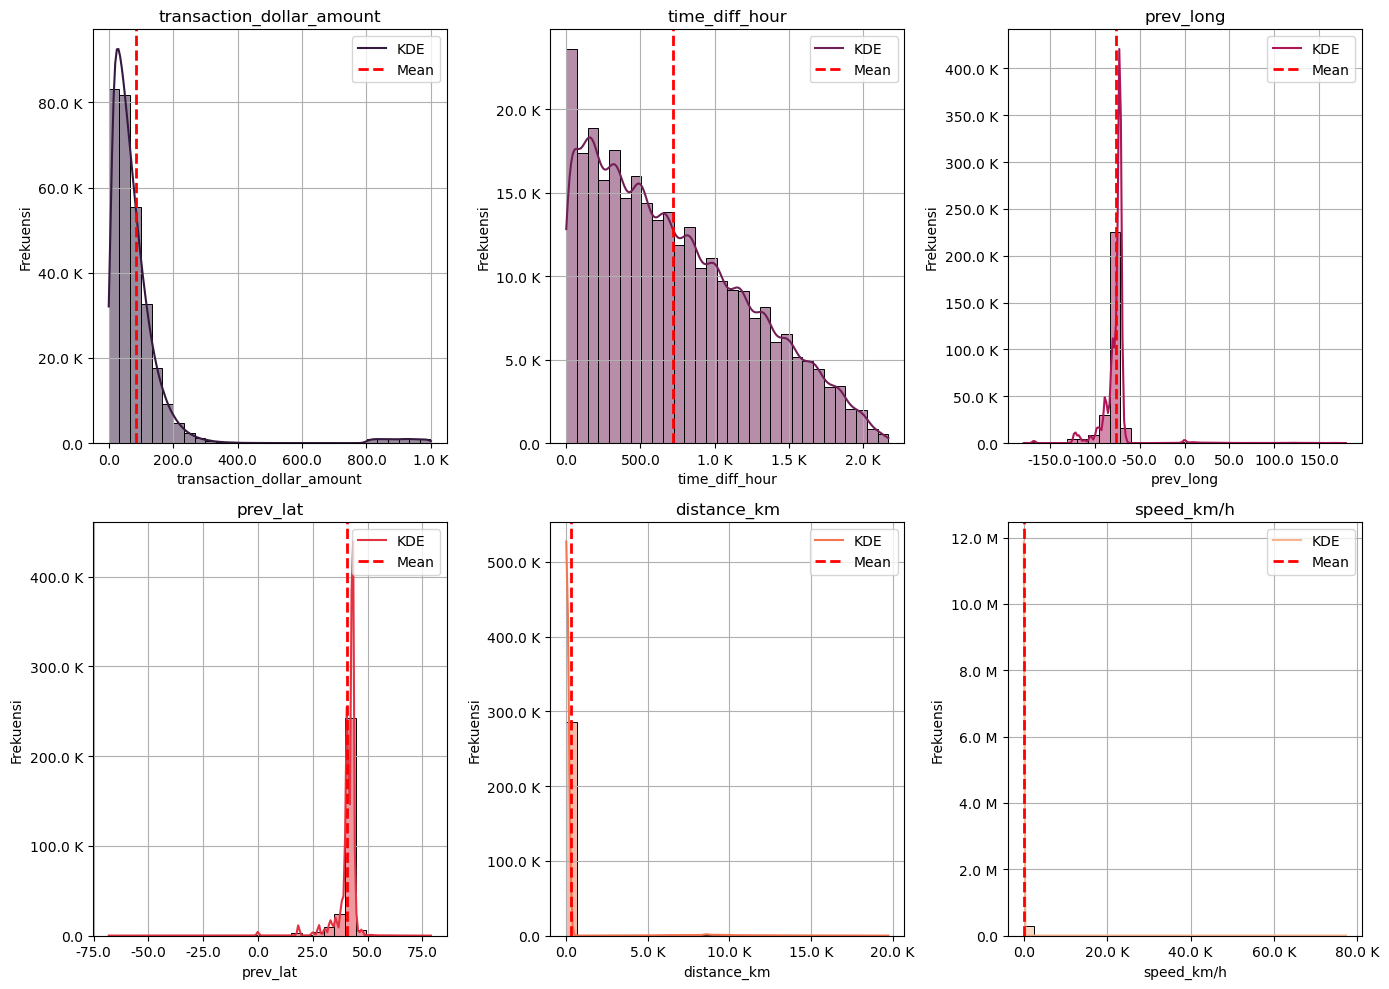

In [14]:
#
hist_data = hist_data.drop(columns = exclude_col, errors = 'ignore')

# Set up subplot grid
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (14, 10))

# Flatten axes for easy iteration
ax = ax.flatten()

# Get number of columns in hist_data
num_cols = len(hist_data.columns)

# Generate colors from a colormap with enough colors for each subplot
colors = sns.color_palette("rocket", num_cols)

# Plot each histogram
for i, column in enumerate(hist_data.columns):
    sns.histplot(hist_data[column], bins = 30, kde = True, color = colors[i], edgecolor = 'black', ax = ax[i])
    ax[i].set_title(column)
    ax[i].set_xlabel(column)
    ax[i].set_ylabel('Frekuensi')

    # Adding vertical line for mean
    ax[i].axvline(x=hist_data[column].mean(), color = 'red', linestyle = '--', linewidth = 2)

    # Add legend
    ax[i].legend(['KDE', 'Mean'], loc = 'upper right')

     # Applying format_number function to the ylabel
    ax[i].xaxis.set_major_formatter(ticker.FuncFormatter(lab_round))
    ax[i].yaxis.set_major_formatter(ticker.FuncFormatter(lab_round))
    ax[i].grid(True)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

### Data Transformation

In [15]:
# log transform
# =====================
cc_df['log_transaction_dollar_amount'] = np.log1p(cc_df['transaction_dollar_amount'])
cc_df['log_distance_km'] = np.log1p(cc_df['distance_km'])
cc_df['log_speed_km/h'] = np.log1p(cc_df['speed_km/h'])

# square transform
# =====================
cc_df['square_time_diff_hour'] = np.sqrt(cc_df['time_diff_hour'])

# box-cox
# =====================
cc_df['box_cox_transaction_dollar_amount'], lambda_feature_transaction_dollar_amount = boxcox(cc_df['transaction_dollar_amount'] + 1)

In [16]:
# Data
exc_data = ['credit_card', 'long', 'lat', 'zipcode', 'year',
            'transaction_dollar_amount', 'time_diff_hour', 
            'distance_km', 'speed_km/h']
hist_data = cc_df.select_dtypes(include = ['number']).drop(columns = exc_data, errors = 'ignore')

hist_data.columns

Index(['prev_long', 'prev_lat', 'log_transaction_dollar_amount',
       'log_distance_km', 'log_speed_km/h', 'square_time_diff_hour',
       'box_cox_transaction_dollar_amount'],
      dtype='object')

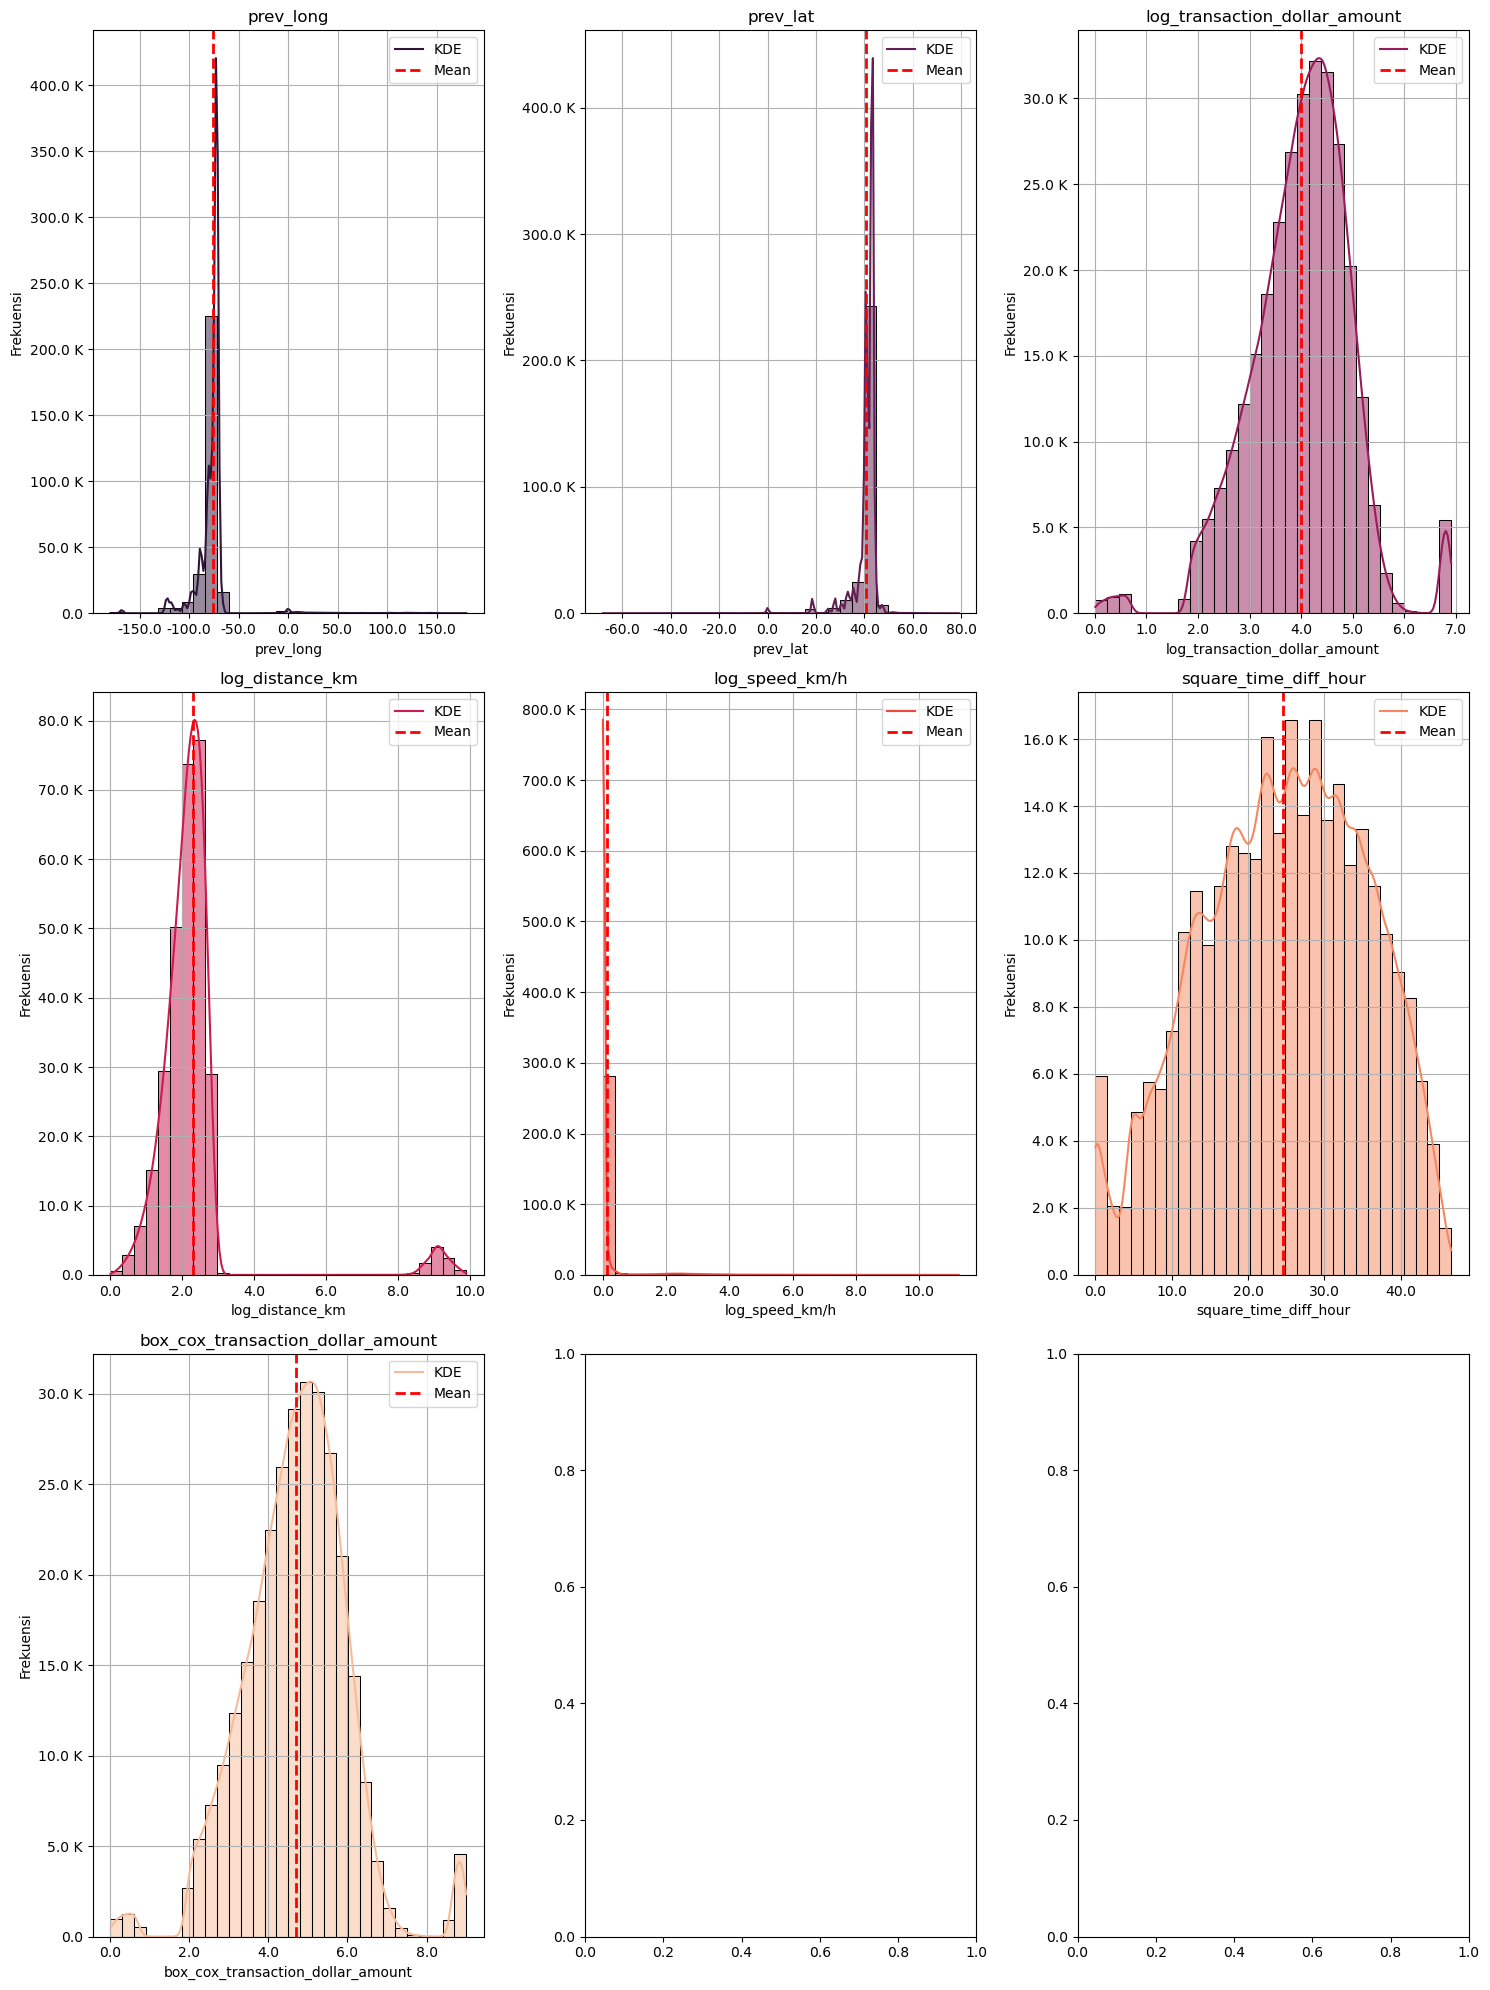

In [17]:
# Set up subplot grid
fig, ax = plt.subplots(nrows = 3, ncols = 3, figsize = (15, 20))

# Flatten axes for easy iteration
ax = ax.flatten()

# Get number of columns in hist_data
num_cols = len(hist_data.columns)

# Generate colors from a colormap with enough colors for each subplot
colors = sns.color_palette("rocket", num_cols)

# Plot each histogram
for i, column in enumerate(hist_data.columns):
    sns.histplot(hist_data[column], bins = 30, kde = True, color = colors[i], edgecolor = 'black', ax = ax[i])
    ax[i].set_title(column)
    ax[i].set_xlabel(column)
    ax[i].set_ylabel('Frekuensi')

    # Adding vertical line for mean
    ax[i].axvline(x=hist_data[column].mean(), color = 'red', linestyle = '--', linewidth = 2)

    # Add legend
    ax[i].legend(['KDE', 'Mean'], loc = 'upper right')

     # Applying format_number function to the ylabel
    ax[i].xaxis.set_major_formatter(ticker.FuncFormatter(lab_round))
    ax[i].yaxis.set_major_formatter(ticker.FuncFormatter(lab_round))
    ax[i].grid(True)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

In [18]:
# Data
exc_data = ['credit_card', 'long', 'lat', 'zipcode', 'year',
            'transaction_dollar_amount', 'time_diff_hour', 
            'distance_km', 'speed_km/h']
df_check = cc_df.select_dtypes(include = ['number']).drop(columns = exc_data, errors = 'ignore')

df_check.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294588 entries, 0 to 294587
Data columns (total 7 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   prev_long                          294588 non-null  float64
 1   prev_lat                           294588 non-null  float64
 2   log_transaction_dollar_amount      294588 non-null  float64
 3   log_distance_km                    294588 non-null  float64
 4   log_speed_km/h                     294588 non-null  float64
 5   square_time_diff_hour              294588 non-null  float64
 6   box_cox_transaction_dollar_amount  294588 non-null  float64
dtypes: float64(7)
memory usage: 15.7 MB


In [19]:
# Menghitung skewness dan kurtosis
skewness_values = df_check.skew()
kurtosis_values = df_check.kurtosis()

# Menentukan kolom yang masih perlu transformasi
columns_to_transform = skewness_values[(abs(skewness_values) > 0.5) | (kurtosis_values > 3)].index.tolist()

# Menampilkan hasil
print("Skewness: \n", skewness_values, '\n')
print("Kurtosis: \n", kurtosis_values, '\n')
print("Kolom yang perlu transformasi tambahan: ", columns_to_transform)

Skewness: 
 prev_long                            5.068675
prev_lat                            -5.827603
log_transaction_dollar_amount       -0.333596
log_distance_km                      4.179937
log_speed_km/h                       6.547365
square_time_diff_hour               -0.209238
box_cox_transaction_dollar_amount    0.033949
dtype: float64 

Kurtosis: 
 prev_long                            50.428090
prev_lat                             52.689088
log_transaction_dollar_amount         1.594619
log_distance_km                      19.318422
log_speed_km/h                       51.585244
square_time_diff_hour                -0.695071
box_cox_transaction_dollar_amount     1.470745
dtype: float64 

Kolom yang perlu transformasi tambahan:  ['prev_long', 'prev_lat', 'log_distance_km', 'log_speed_km/h']


##### Transform Again

In [20]:
# box-cox
# =====================
from scipy.stats import boxcox

cc_df['box_cox_distance_km'], lambda_distance = boxcox(cc_df['log_distance_km'] + 1e-5)
cc_df['box_cox_speed_km/h'], lambda_speed = boxcox(cc_df['log_speed_km/h'] + 1e-5)


# yeo-jhonson
# =====================
cc_df['yeo_johnson_distance_km'] = power_transform(cc_df[['log_distance_km']], method='yeo-johnson')
cc_df['yeo_johnson_speed_km/h'] = power_transform(cc_df[['log_speed_km/h']], method='yeo-johnson')

# # Alternatif: Reciprocal Transformation (jika masih sangat skewed)
# df['reciprocal_distance_km'] = 1 / (df['log_distance_km'] + 1)  # Tambah 1 agar tidak terbagi nol
# df['reciprocal_speed_km/h'] = 1 / (df['log_speed_km/h'] + 1)


In [21]:
# Data
exc_data = ['credit_card', 'long', 'lat', 'zipcode', 'year',
            'transaction_dollar_amount', 'time_diff_hour', 
            'distance_km', 'speed_km/h', 'log_transaction_dollar_amount', 
            'yeo_johnson_distance_km']
hist_data = cc_df.select_dtypes(include = ['number']).drop(columns = exc_data, errors = 'ignore')

hist_data.columns

Index(['prev_long', 'prev_lat', 'log_distance_km', 'log_speed_km/h',
       'square_time_diff_hour', 'box_cox_transaction_dollar_amount',
       'box_cox_distance_km', 'box_cox_speed_km/h', 'yeo_johnson_speed_km/h'],
      dtype='object')

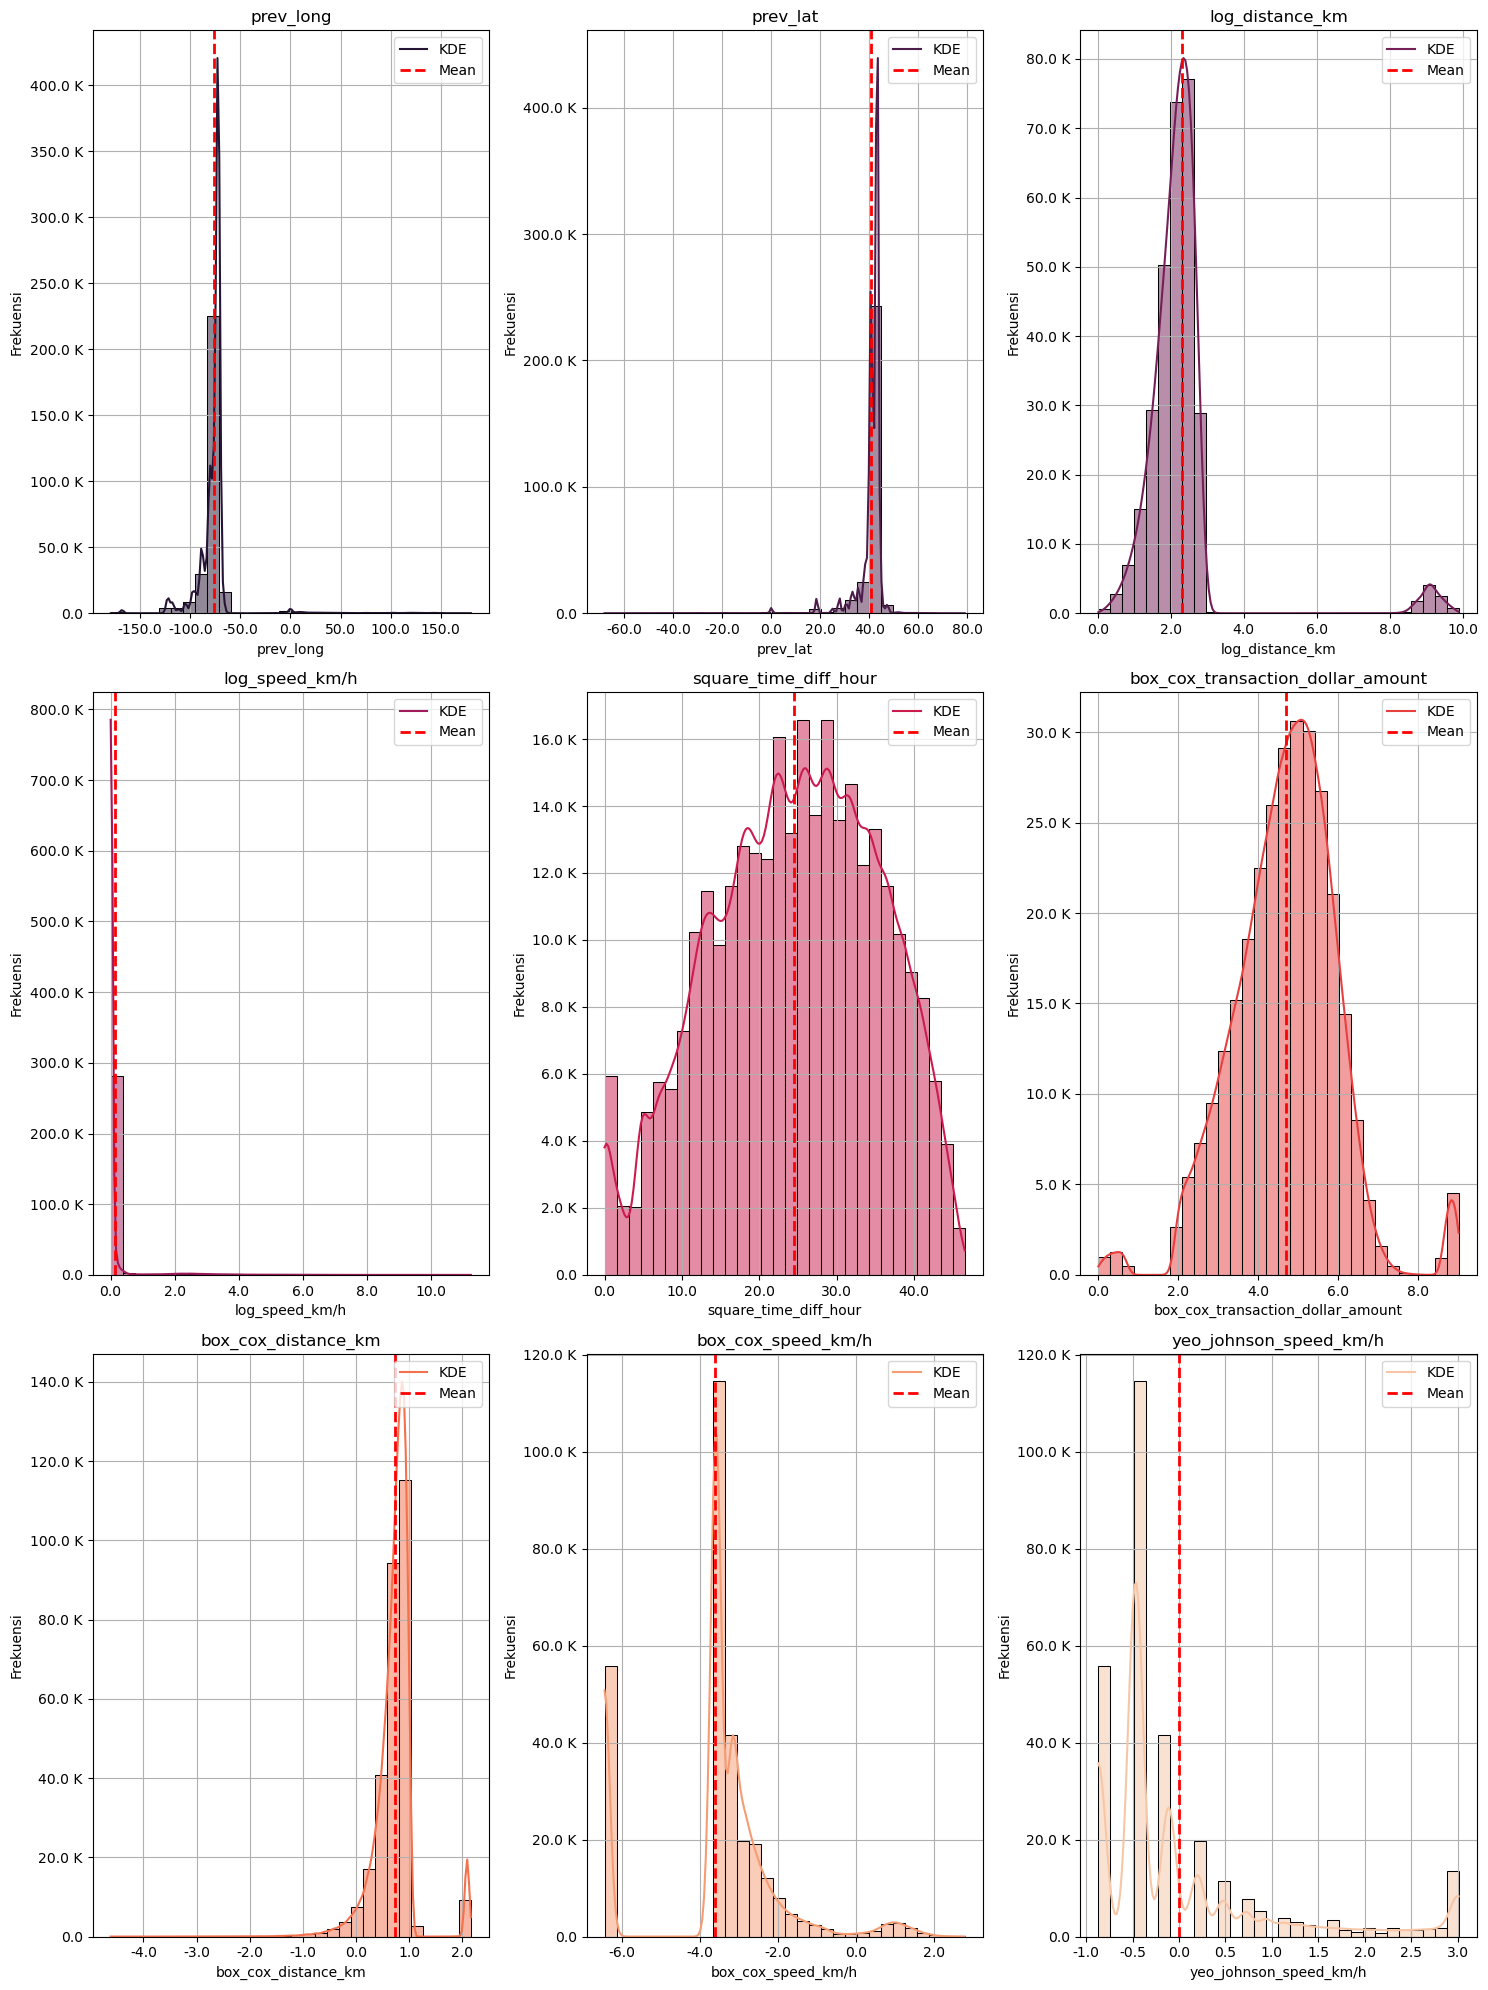

In [22]:
# Set up subplot grid
fig, ax = plt.subplots(nrows = 3, ncols = 3, figsize = (15, 20))

# Flatten axes for easy iteration
ax = ax.flatten()

# Get number of columns in hist_data
num_cols = len(hist_data.columns)

# Generate colors from a colormap with enough colors for each subplot
colors = sns.color_palette("rocket", num_cols)

# Plot each histogram
for i, column in enumerate(hist_data.columns):
    sns.histplot(hist_data[column], bins = 30, kde = True, color = colors[i], edgecolor = 'black', ax = ax[i])
    ax[i].set_title(column)
    ax[i].set_xlabel(column)
    ax[i].set_ylabel('Frekuensi')

    # Adding vertical line for mean
    ax[i].axvline(x=hist_data[column].mean(), color = 'red', linestyle = '--', linewidth = 2)

    # Add legend
    ax[i].legend(['KDE', 'Mean'], loc = 'upper right')

     # Applying format_number function to the ylabel
    ax[i].xaxis.set_major_formatter(ticker.FuncFormatter(lab_round))
    ax[i].yaxis.set_major_formatter(ticker.FuncFormatter(lab_round))
    ax[i].grid(True)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

In [23]:
# Data
exc_data = ['credit_card', 'long', 'lat', 'zipcode', 'year',
            'transaction_dollar_amount', 'time_diff_hour', 
            'distance_km', 'speed_km/h', 'log_distance_km', 
            'log_speed_km/h', 'box_cox_distance_km', 'yeo_johnson_speed_km/h']

df_check = cc_df.select_dtypes(include = ['number']).drop(columns = exc_data, errors = 'ignore')

df_check.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294588 entries, 0 to 294587
Data columns (total 7 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   prev_long                          294588 non-null  float64
 1   prev_lat                           294588 non-null  float64
 2   log_transaction_dollar_amount      294588 non-null  float64
 3   square_time_diff_hour              294588 non-null  float64
 4   box_cox_transaction_dollar_amount  294588 non-null  float64
 5   box_cox_speed_km/h                 294588 non-null  float64
 6   yeo_johnson_distance_km            294588 non-null  float64
dtypes: float64(7)
memory usage: 15.7 MB


In [24]:
# Menghitung skewness dan kurtosis
skewness_values = df_check.skew()
kurtosis_values = df_check.kurtosis()

# Menentukan kolom yang masih perlu transformasi
columns_to_transform = skewness_values[(abs(skewness_values) > 0.5) | (kurtosis_values > 3)].index.tolist()

# Menampilkan hasil
print("Skewness: \n", skewness_values, '\n')
print("Kurtosis: \n", kurtosis_values, '\n')
print("Kolom yang perlu transformasi tambahan: ", columns_to_transform)

Skewness: 
 prev_long                            5.068675
prev_lat                            -5.827603
log_transaction_dollar_amount       -0.333596
square_time_diff_hour               -0.209238
box_cox_transaction_dollar_amount    0.033949
box_cox_speed_km/h                   0.035218
yeo_johnson_distance_km             -0.304581
dtype: float64 

Kurtosis: 
 prev_long                            50.428090
prev_lat                             52.689088
log_transaction_dollar_amount         1.594619
square_time_diff_hour                -0.695071
box_cox_transaction_dollar_amount     1.470745
box_cox_speed_km/h                    1.010001
yeo_johnson_distance_km               5.060830
dtype: float64 

Kolom yang perlu transformasi tambahan:  ['prev_long', 'prev_lat', 'yeo_johnson_distance_km']


#### Kurtois Normalization

In [25]:
from scipy.stats.mstats import winsorize

cc_df['winsorized_yeo_johnson_distance_km'] = winsorize(cc_df['yeo_johnson_distance_km'], limits=[0.02, 0.02])  # Pangkas 5% teratas dan terbawah


In [26]:
# Data
exc_data = ['credit_card', 'long', 'lat', 'zipcode', 'year',
            'transaction_dollar_amount', 'time_diff_hour', 
            'distance_km', 'speed_km/h', 'log_distance_km', 
            'log_speed_km/h', 'box_cox_distance_km', 
            'yeo_johnson_speed_km/h', 'yeo_johnson_distance_km']

df_check = cc_df.select_dtypes(include = ['number']).drop(columns = exc_data, errors = 'ignore')

df_check.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294588 entries, 0 to 294587
Data columns (total 7 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   prev_long                           294588 non-null  float64
 1   prev_lat                            294588 non-null  float64
 2   log_transaction_dollar_amount       294588 non-null  float64
 3   square_time_diff_hour               294588 non-null  float64
 4   box_cox_transaction_dollar_amount   294588 non-null  float64
 5   box_cox_speed_km/h                  294588 non-null  float64
 6   winsorized_yeo_johnson_distance_km  294588 non-null  float64
dtypes: float64(7)
memory usage: 15.7 MB


In [27]:
# Menghitung skewness dan kurtosis
skewness_values = df_check.skew()
kurtosis_values = df_check.kurtosis()

# Menentukan kolom yang masih perlu transformasi
columns_to_transform = skewness_values[(abs(skewness_values) > 0.5) | (kurtosis_values > 3)].index.tolist()

# Menampilkan hasil
print("Skewness: \n", skewness_values, '\n')
print("Kurtosis: \n", kurtosis_values, '\n')
print("Kolom yang perlu transformasi tambahan: ", columns_to_transform)

Skewness: 
 prev_long                             5.068675
prev_lat                             -5.827603
log_transaction_dollar_amount        -0.333596
square_time_diff_hour                -0.209238
box_cox_transaction_dollar_amount     0.033949
box_cox_speed_km/h                    0.035218
winsorized_yeo_johnson_distance_km    0.304731
dtype: float64 

Kurtosis: 
 prev_long                             50.428090
prev_lat                              52.689088
log_transaction_dollar_amount          1.594619
square_time_diff_hour                 -0.695071
box_cox_transaction_dollar_amount      1.470745
box_cox_speed_km/h                     1.010001
winsorized_yeo_johnson_distance_km     3.376705
dtype: float64 

Kolom yang perlu transformasi tambahan:  ['prev_long', 'prev_lat', 'winsorized_yeo_johnson_distance_km']


### Outlier Check

In [28]:
df_check.columns

Index(['prev_long', 'prev_lat', 'log_transaction_dollar_amount',
       'square_time_diff_hour', 'box_cox_transaction_dollar_amount',
       'box_cox_speed_km/h', 'winsorized_yeo_johnson_distance_km'],
      dtype='object')

clean with z-score

In [29]:
from scipy.stats import zscore

# Daftar kolom yang ingin dicek outliernya
columns_to_check = df_check.columns

# Hitung Z-score untuk setiap kolom
cc_df[[f'zscore_{col}' for col in columns_to_check]] = cc_df[columns_to_check].apply(zscore)

In [30]:
# Buat kondisi untuk mendeteksi outlier (|Z-score| > 3 di salah satu kolom)
outlier_condition = (cc_df[[f'zscore_{col}' for col in columns_to_check]].abs() > 3).any(axis=1)

# Filter data yang mengandung outlier
outliers = cc_df[outlier_condition]

In [31]:
# Hapus baris yang memiliki outlier
cc_df_filtered = cc_df[~outlier_condition] 

print(f"Rows before filter: \t{cc_df.shape}")
print(f"Rows after filter: \t{cc_df_filtered.shape}")

Rows before filter: 	(294588, 42)
Rows after filter: 	(273649, 42)


#### IQR Methode

In [32]:
exc_col = ['credit_card', 'long', 'lat', 'zipcode', 'year', 
           'transaction_dollar_amount', 'time_diff_hour', 'distance_km', 
           'speed_km/h', 'zscore_log_transaction_dollar_amount', 
           'log_transaction_dollar_amount', 'log_distance_km', 
           'log_speed_km/h', 'square_time_diff_hour', 
           'box_cox_transaction_dollar_amount', 'box_cox_distance_km', 
           'box_cox_speed_km/h', 'yeo_johnson_distance_km', 
           'yeo_johnson_speed_km/h', 'winsorized_yeo_johnson_distance_km']

# Data
box_data = cc_df_filtered.select_dtypes(include = ['number'])
box_data = box_data.drop(columns = exc_col)

print(box_data.columns)
print(len(box_data.columns))

Index(['prev_long', 'prev_lat', 'zscore_prev_long', 'zscore_prev_lat',
       'zscore_square_time_diff_hour',
       'zscore_box_cox_transaction_dollar_amount', 'zscore_box_cox_speed_km/h',
       'zscore_winsorized_yeo_johnson_distance_km'],
      dtype='object')
8


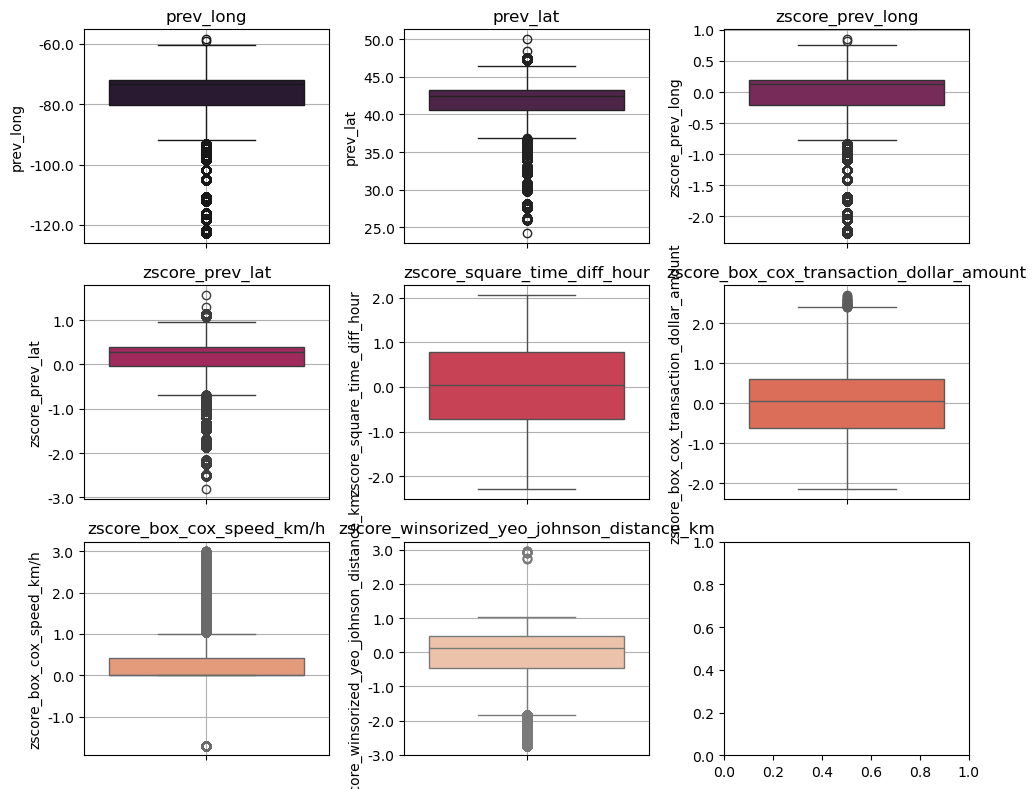

In [33]:
# Set up subplot grid
fig, ax = plt.subplots(nrows = 3, ncols = 3, figsize = (10, 8))

# Flatten axes for easy iteration
ax = ax.flatten()

# Get number of columns in hist_data
num_cols = len(box_data.columns)

# Generate colors from a colormap with enough colors for each subplot
colors = sns.color_palette("rocket", num_cols)

# Create boxplots for each column
for i, col in enumerate(box_data.columns):
    sns.boxplot(y = col, data = box_data, ax = ax[i], color = colors[i])
    ax[i].yaxis.set_major_formatter(ticker.FuncFormatter(lab_round))
    ax[i].set_title(col)
    ax[i].grid(axis = 'both')

#
plt.tight_layout()

# Show plot
plt.show()

In [34]:
# DataFrame columns to check for outliers
columns_to_check = box_data.columns

# Function to calculate IQR and filter outliers
def filter_outliers(df, columns):
    while True:
        outlier_indices = set()
        
        for col in columns:
            Q1 = np.percentile(df[col], 25, method = 'midpoint')
            Q3 = np.percentile(df[col], 75, method = 'midpoint')
            IQR = Q3 - Q1
            
            upper_bound = Q3 + 1.5 * IQR
            lower_bound = Q1 - 1.5 * IQR
            
            col_outliers = df[(df[col] >= upper_bound) | (df[col] <= lower_bound)].index
            outlier_indices.update(col_outliers)
        
        # If no outliers are found, break the loop
        if not outlier_indices:
            break
        
        # Remove outliers
        df.drop(index=outlier_indices, inplace=True)
    
    return df

# Apply the function
cc_df_cleaned = filter_outliers(cc_df.copy(), columns_to_check)

# Display the old and new shape of the DataFrame
print(f'Old Shape: {cc_df_filtered.shape}')
print(f'New Shape: {cc_df_cleaned.shape}')

Old Shape: (273649, 42)
New Shape: (156656, 42)


#### Re-Checking

In [35]:
exc_col = ['credit_card', 'long', 'lat', 'zipcode', 'year', 
           'transaction_dollar_amount', 'time_diff_hour', 'distance_km', 
           'speed_km/h', 'zscore_log_transaction_dollar_amount', 
           'log_transaction_dollar_amount', 'log_distance_km', 
           'log_speed_km/h', 'square_time_diff_hour', 
           'box_cox_transaction_dollar_amount', 'box_cox_distance_km', 
           'box_cox_speed_km/h', 'yeo_johnson_distance_km', 
           'yeo_johnson_speed_km/h', 'winsorized_yeo_johnson_distance_km']

# Data
box_data = cc_df_cleaned.select_dtypes(include = ['number'])
box_data = box_data.drop(columns = exc_col)

print(box_data.columns)
print(len(box_data.columns))

Index(['prev_long', 'prev_lat', 'zscore_prev_long', 'zscore_prev_lat',
       'zscore_square_time_diff_hour',
       'zscore_box_cox_transaction_dollar_amount', 'zscore_box_cox_speed_km/h',
       'zscore_winsorized_yeo_johnson_distance_km'],
      dtype='object')
8


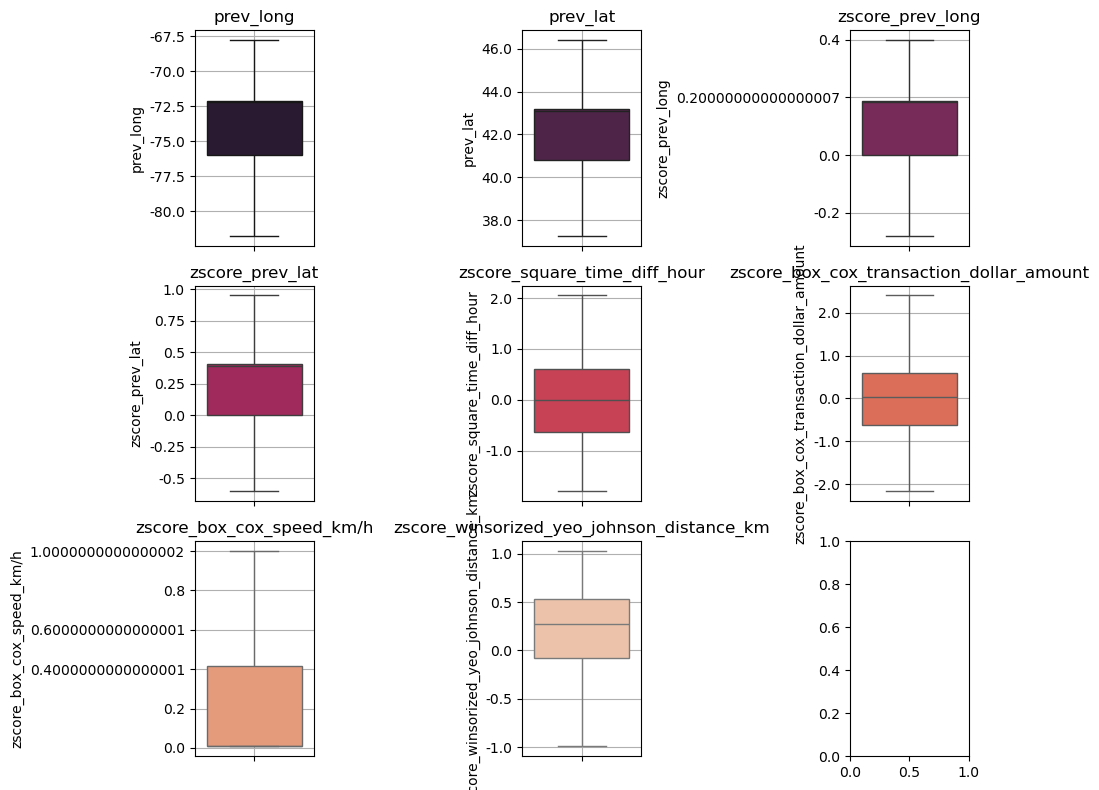

In [36]:
# Set up subplot grid
fig, ax = plt.subplots(nrows = 3, ncols = 3, figsize = (10, 8))

# Flatten axes for easy iteration
ax = ax.flatten()

# Get number of columns in hist_data
num_cols = len(box_data.columns)

# Generate colors from a colormap with enough colors for each subplot
colors = sns.color_palette("rocket", num_cols)

# Create boxplots for each column
for i, col in enumerate(box_data.columns):
    sns.boxplot(y = col, data = box_data, ax = ax[i], color = colors[i])
    ax[i].yaxis.set_major_formatter(ticker.FuncFormatter(lab_round))
    ax[i].set_title(col)
    ax[i].grid(axis = 'both')

#
plt.tight_layout()

# Show plot
plt.show()

In [37]:
# drop unnecessary column
exc_col = ['zscore_log_transaction_dollar_amount', 
           'log_transaction_dollar_amount', 'log_distance_km', 
           'log_speed_km/h', 'square_time_diff_hour', 
           'box_cox_transaction_dollar_amount', 'box_cox_distance_km', 
           'box_cox_speed_km/h', 'yeo_johnson_distance_km', 
           'yeo_johnson_speed_km/h', 'winsorized_yeo_johnson_distance_km', 
           'zscore_square_time_diff_hour', 'zscore_box_cox_transaction_dollar_amount', 
           'zscore_box_cox_speed_km/h', 'zscore_winsorized_yeo_johnson_distance_km', 
           'zscore_prev_long', 'zscore_prev_lat']

cc_df = cc_df.drop(columns = exc_col)
cc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294588 entries, 0 to 294587
Data columns (total 25 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   credit_card                294588 non-null  int64         
 1   datetime                   294588 non-null  datetime64[ns]
 2   long                       294588 non-null  float64       
 3   lat                        294588 non-null  float64       
 4   zipcode                    294588 non-null  int64         
 5   state                      294588 non-null  object        
 6   city                       294588 non-null  object        
 7   date                       294588 non-null  object        
 8   year                       294588 non-null  int32         
 9   quarter                    294588 non-null  object        
 10  month                      294588 non-null  object        
 11  season                     294588 non-null  object  

In [38]:
cc_df.head()

,credit_card,datetime,long,lat,zipcode,state,city,date,year,quarter,month,season,week_cat,day,time,limit_cat,transaction_dollar_amount,prev_time,time_diff_hour,prev_long,prev_lat,distance_km,geo_cat,speed_km/h,fraud
0,1003715054175576,2015-09-11 00:32:40,-80.174132,40.267370,15342,pa,houston,2015-09-11,2015,2015Q3,september,fall,weekday,friday,00:32:40,medium,43.78,2015-09-11 00:32:40,0.00,0.000000,0.000000,9177.582847,anomaly,0.00,fraud
1,1003715054175576,2015-10-24 22:23:08,-80.194240,40.180114,15342,pa,houston,2015-10-24,2015,2015Q4,october,fall,weekend,saturday,22:23:08,medium,103.15,2015-09-11 00:32:40,1053.84,-80.174132,40.267370,9.838861,normal,0.01,not_fraud
2,1003715054175576,2015-10-26 18:19:36,-80.211033,40.313004,15342,pa,houston,2015-10-26,2015,2015Q4,october,fall,weekday,monday,18:19:36,medium,48.55,2015-10-24 22:23:08,43.94,-80.194240,40.180114,14.825103,normal,0.34,not_fraud
3,1003715054175576,2015-10-22 19:41:10,-80.174138,40.290895,15342,pa,houston,2015-10-22,2015,2015Q4,october,fall,weekday,thursday,19:41:10,medium,136.18,2015-10-26 18:19:36,94.64,-80.211033,40.313004,3.983158,normal,0.04,not_fraud
4,1003715054175576,2015-10-26 20:08:22,-80.238720,40.166719,15342,pa,houston,2015-10-26,2015,2015Q4,october,fall,weekday,monday,20:08:22,medium,71.82,2015-10-22 19:41:10,96.45,-80.174138,40.290895,14.843545,normal,0.15,not_fraud


## Basic Visualization

### Heatmap

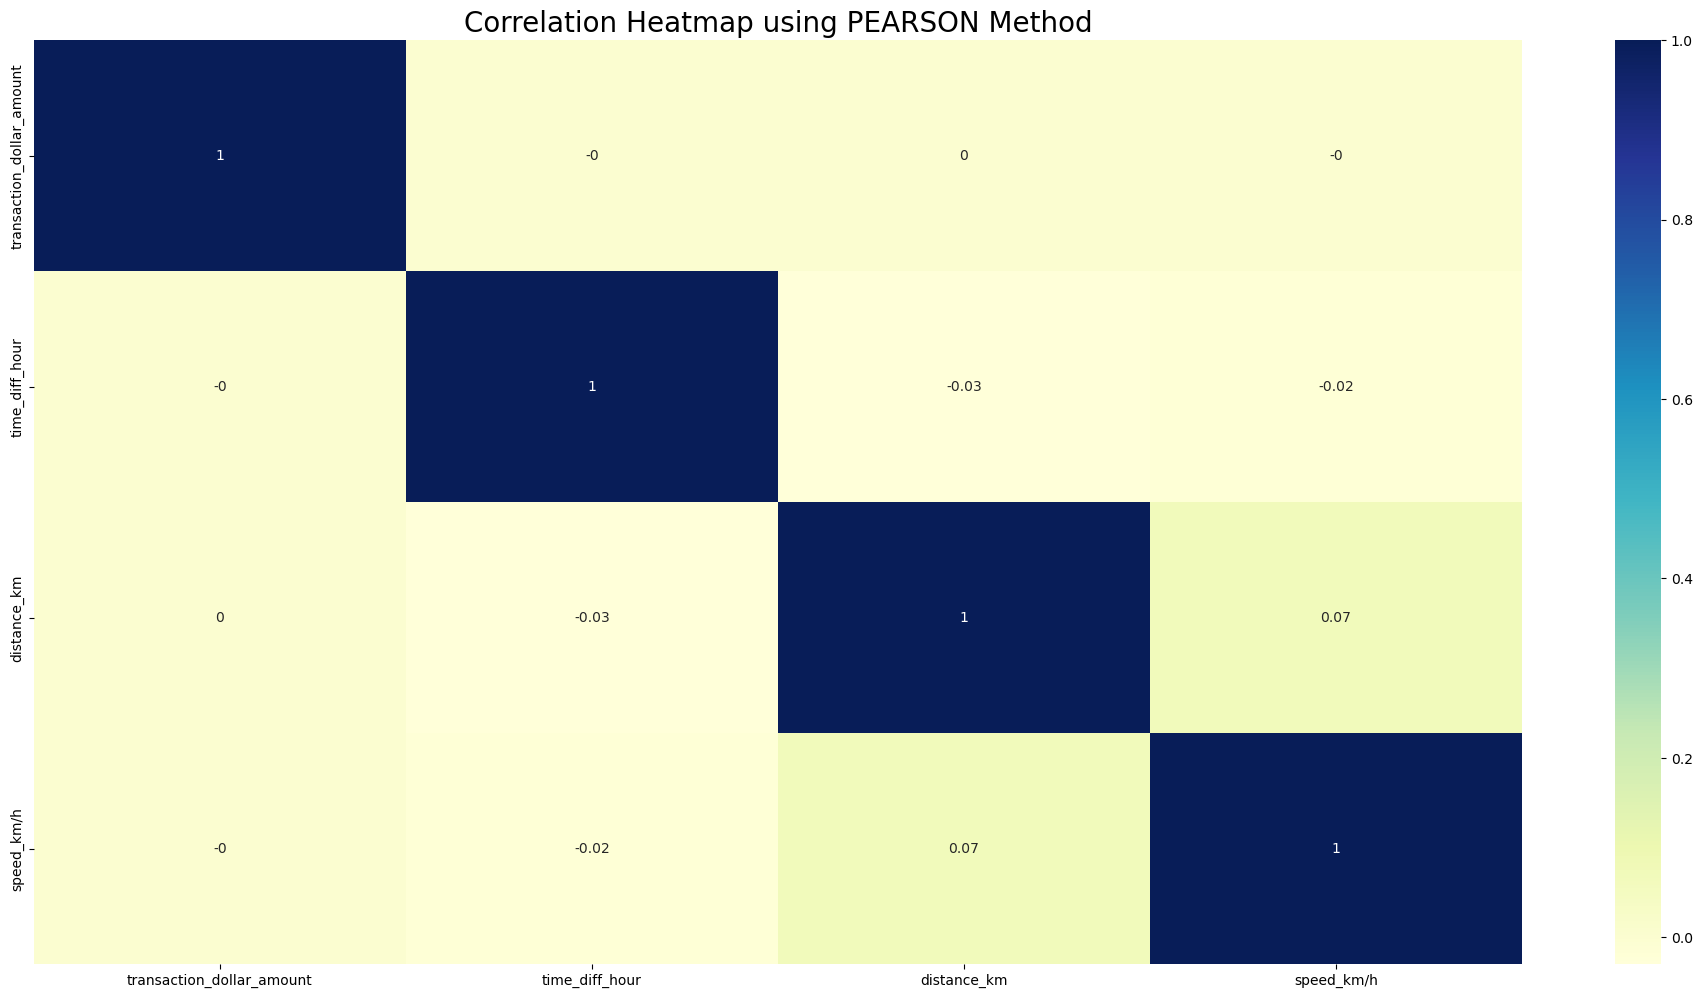

VIF PEARSON Method :
                     Feature   VIF
0  transaction_dollar_amount  1.27
1             time_diff_hour  1.28
2                distance_km  1.02
3                 speed_km/h  1.01 



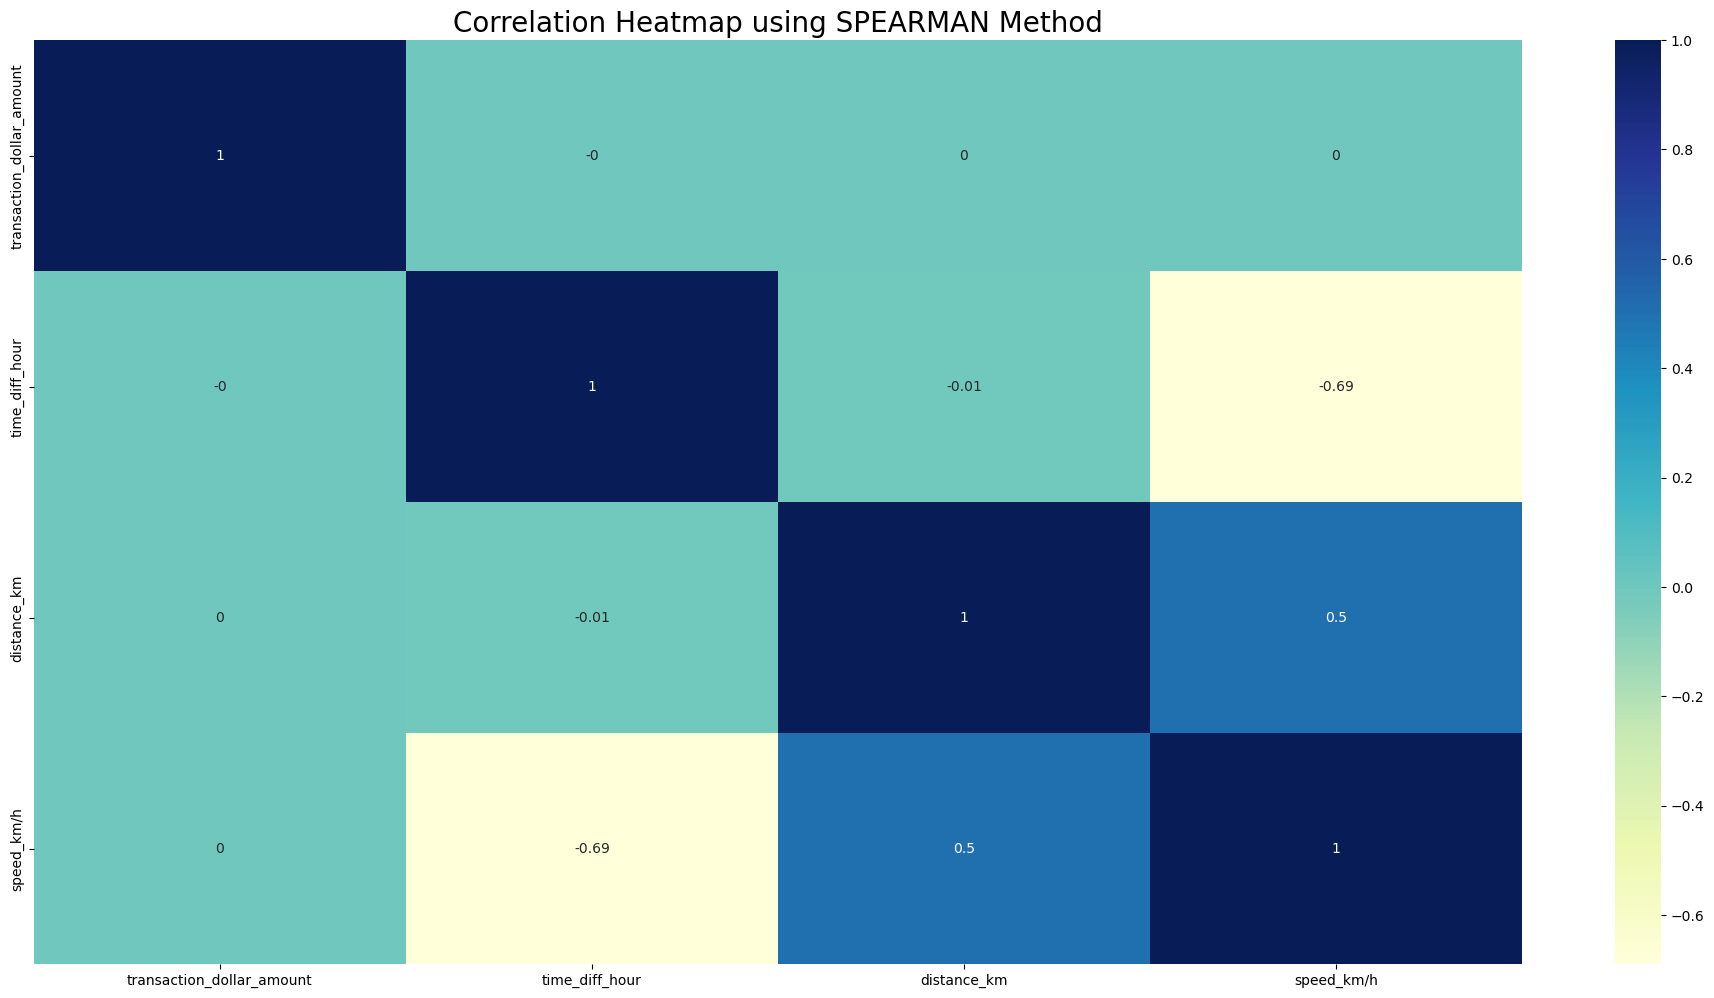

VIF SPEARMAN Method :
                     Feature   VIF
0  transaction_dollar_amount  1.27
1             time_diff_hour  1.28
2                distance_km  1.02
3                 speed_km/h  1.01 



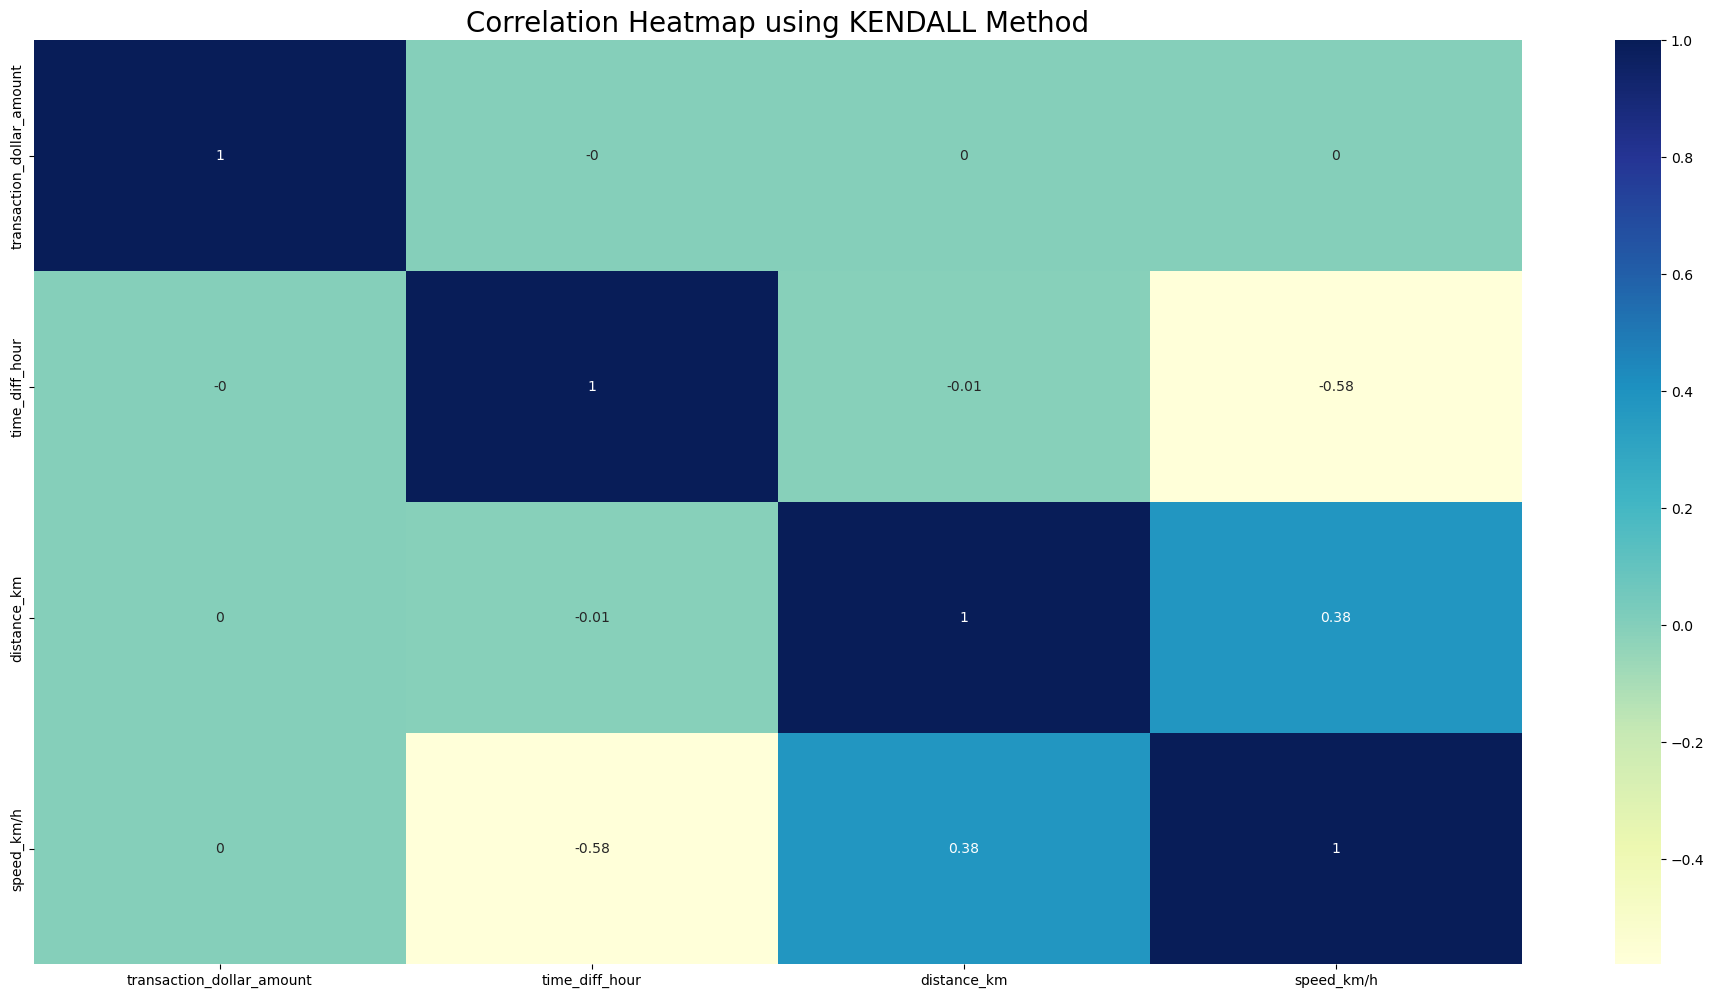

VIF KENDALL Method :
                     Feature   VIF
0  transaction_dollar_amount  1.27
1             time_diff_hour  1.28
2                distance_km  1.02
3                 speed_km/h  1.01 



In [39]:
# Date & Numeric Correlations
correlations_data = cc_df.select_dtypes(include = 'number')

exclude_col = ['credit_card', 'long', 'lat', 'zipcode', 'year', 
               'prev_long', 'prev_lat']

correlations_data = correlations_data.drop(columns = exclude_col)

# List of correlation methods to be used
sample_methods = ['pearson', 'spearman', 'kendall']

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_features = correlations_data.columns

# Plotting correlation heatmap for each method
for method in sample_methods:
    # Creat canvas
    plt.figure(figsize = (24, 12))  # Set the figure size for each heatmap
    plt.title(f'Correlation Heatmap using {method.upper()} Method', fontsize = 20)

    # Calculate correlation for the current method
    corr_matrix = correlations_data.corr(method = method).round(2)

    # Plot heatmap
    sns.heatmap(corr_matrix, cmap = "YlGnBu", annot = True)
    plt.show()

    # Variance Inflation Factor (VIF)
    X = correlations_data[vif_features]
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    print(f"VIF {method.upper()} Method :\n{round(vif_data, 2)} \n")

### Uni-variate Analyst

In [40]:
cat_df = cc_df.select_dtypes(include = 'object')
cat_df.head()

,state,city,date,quarter,month,season,week_cat,day,time,limit_cat,geo_cat,fraud
0,pa,houston,2015-09-11,2015Q3,september,fall,weekday,friday,00:32:40,medium,anomaly,fraud
1,pa,houston,2015-10-24,2015Q4,october,fall,weekend,saturday,22:23:08,medium,normal,not_fraud
2,pa,houston,2015-10-26,2015Q4,october,fall,weekday,monday,18:19:36,medium,normal,not_fraud
3,pa,houston,2015-10-22,2015Q4,october,fall,weekday,thursday,19:41:10,medium,normal,not_fraud
4,pa,houston,2015-10-26,2015Q4,october,fall,weekday,monday,20:08:22,medium,normal,not_fraud


In [41]:
for i in cat_df.columns:
    print(f'{i.upper()} \t: {cat_df[i].unique()} \n')
    print(f'{"-" * 50} \n')

STATE 	: ['pa' 'nh' 'vt' 'wa' 'ny' 'il' 'ga' 'ma' 'wv' 'fl' 'ri' 'nj' 'ia' 'ks'
 'ok' 'oh' 'me' 'mo' 'nm' 'va' 'ca' 'pr' 'tx' 'mi' 'in' 'co' 'al' 'nc'
 'md' 'hi' 'ct' 'id' 'la' 'az' 'ut'] 

-------------------------------------------------- 

CITY 	: ['houston' 'washington' 'charlotte' 'dallas' 'seattle' 'buffalo'
 'new york' 'el paso' 'louisville' 'richmond' 'miami' 'tampa' 'arlington'
 'oakland' 'columbus' 'cedar rapids' 'atlanta' 'memphis' 'wichita'
 'clinton' 'pittsburgh' 'oklahoma city' 'cincinnati' 'auburn' 'charleston'
 'kansas city' 'springfield' 'jackson' 'sacramento' 'rochester'
 'las vegas' 'madison' 'austin' 'saint paul' 'boston' 'roanoke' 'portland'
 'somerset' 'quitman' 'san francisco' 'san antonio' 'lexington'
 'los angeles' 'newport' 'tulsa' 'san diego' 'saint louis' 'albany'
 'lafayette' 'knoxville' 'tacoma' 'friendship' 'indianapolis' 'newark'
 'amarillo' 'birmingham' 'dayton' 'alexandria' 'colorado springs' 'akron'
 'fresno' 'pensacola' 'detroit' 'jacksonville' 'hart

#### State

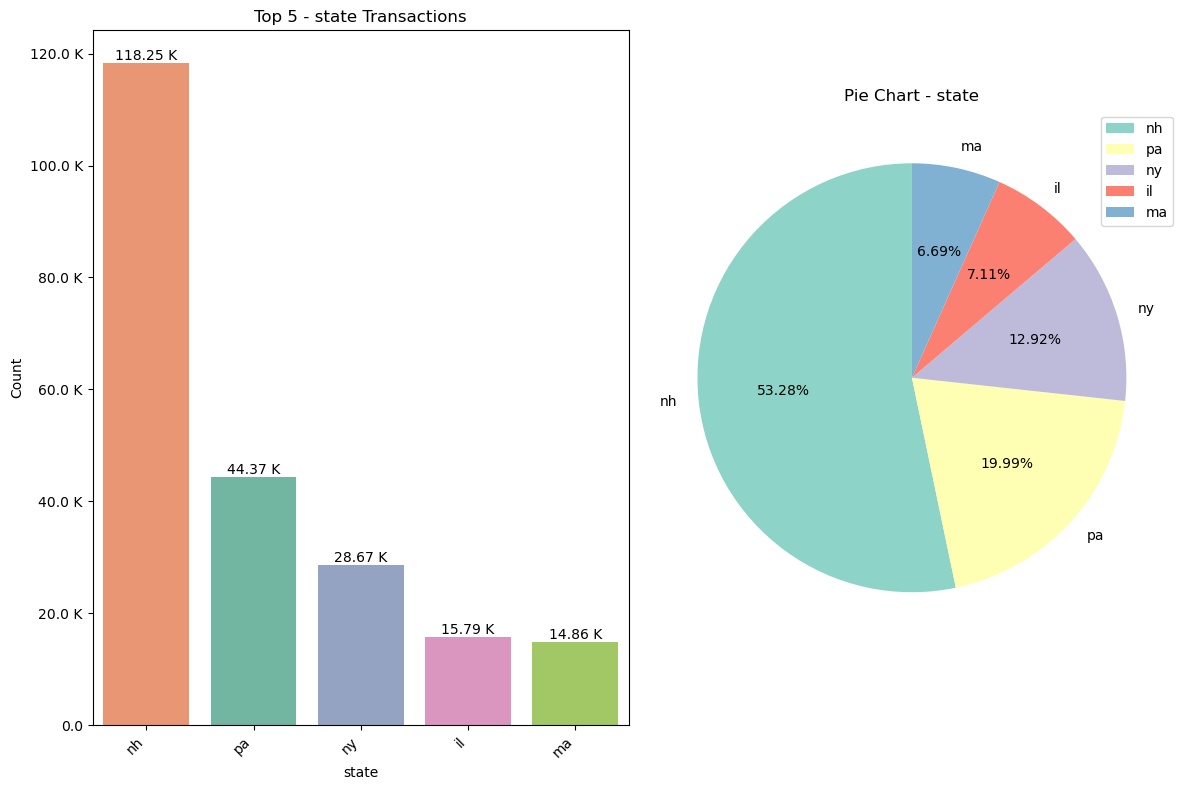

In [42]:
# Specific column
var = 'state'

# Mengambil 10 kategori teratas berdasarkan jumlah kemunculannya
top_categories = cc_df[var].value_counts().index[:5]

# Canvas
plt.figure(figsize = (12, 8))

# Count Plot dengan membatasi kategori yang ditampilkan
ax1 = plt.subplot(1, 2, 1)

# Filter data untuk menampilkan hanya kategori teratas atau "Others"
filtered_df = cc_df[cc_df[var].isin(top_categories)]

# Count Plot dengan filtered data
sns.countplot(x = var, data = filtered_df, ax = ax1, hue = var, palette = 'Set2', order = top_categories)

# Menambahkan judul dan label
ax1.set_title(f'Top 5 - {var} Transactions', fontsize = 12)
ax1.set_xlabel(var, fontsize = 10)
ax1.set_ylabel('Count', fontsize = 10)

# Menambahkan formatter untuk y-axis
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lab_round))

# Menambahkan teks pada setiap batang di countplot
for p in ax1.patches:
    height = p.get_height()
    if height > 0:  # Hanya tambahkan teks jika nilai lebih besar dari nol
        ax1.text(
            p.get_x() + p.get_width() / 2,
            height + 0.1,  # Menempatkan teks di atas batang
            f'{val_round(height)}',
            ha='center',
            va='bottom',
            fontsize=10
        )

# Menambahkan xticks
plt.xticks(rotation = 45, ha = 'right', fontsize = 10)

# Pie Chart dengan kategori teratas
ax2 = plt.subplot(1, 2, 2)
counts = cc_df[var].value_counts()

# Hanya menampilkan kategori teratas untuk pie chart
top_counts = counts.head(5)
ax2.pie(top_counts, labels = top_counts.index, autopct = '%0.2f%%', startangle = 90, colors = sns.color_palette("Set3", len(top_counts)))
ax2.set_title(f'Pie Chart - {var}', fontsize = 12)

# Adjust layout
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

#### City

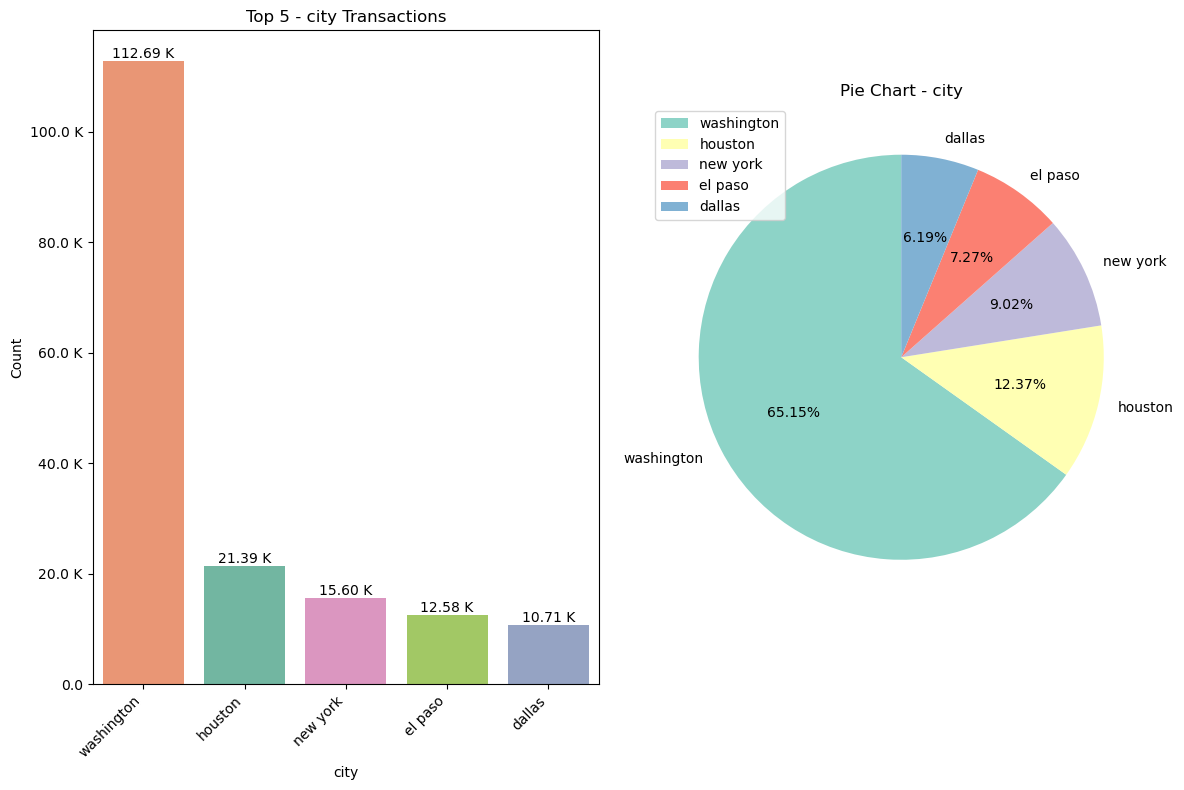

In [43]:
# Specific column
var = 'city'

# Mengambil 10 kategori teratas berdasarkan jumlah kemunculannya
top_categories = cc_df[var].value_counts().index[:5]

# Canvas
plt.figure(figsize = (12, 8))

# Count Plot dengan membatasi kategori yang ditampilkan
ax1 = plt.subplot(1, 2, 1)

# Filter data untuk menampilkan hanya kategori teratas atau "Others"
filtered_df = cc_df[cc_df[var].isin(top_categories)]

# Count Plot dengan filtered data
sns.countplot(x = var, data = filtered_df, ax = ax1, hue = var, palette = 'Set2', order = top_categories)

# Menambahkan judul dan label
ax1.set_title(f'Top 5 - {var} Transactions', fontsize = 12)
ax1.set_xlabel(var, fontsize = 10)
ax1.set_ylabel('Count', fontsize = 10)

# Menambahkan formatter untuk y-axis
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lab_round))

# Menambahkan teks pada setiap batang di countplot
for p in ax1.patches:
    height = p.get_height()
    if height > 0:  # Hanya tambahkan teks jika nilai lebih besar dari nol
        ax1.text(
            p.get_x() + p.get_width() / 2,
            height + 0.1,  # Menempatkan teks di atas batang
            f'{val_round(height)}',
            ha='center',
            va='bottom',
            fontsize=10
        )

# Menambahkan xticks
plt.xticks(rotation = 45, ha = 'right', fontsize = 10)

# Pie Chart dengan kategori teratas
ax2 = plt.subplot(1, 2, 2)
counts = cc_df[var].value_counts()

# Hanya menampilkan kategori teratas untuk pie chart
top_counts = counts.head(5)
ax2.pie(top_counts, labels = top_counts.index, autopct = '%0.2f%%', startangle = 90, colors = sns.color_palette("Set3", len(top_counts)))
ax2.set_title(f'Pie Chart - {var}', fontsize = 12)

# Adjust layout
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

#### Season

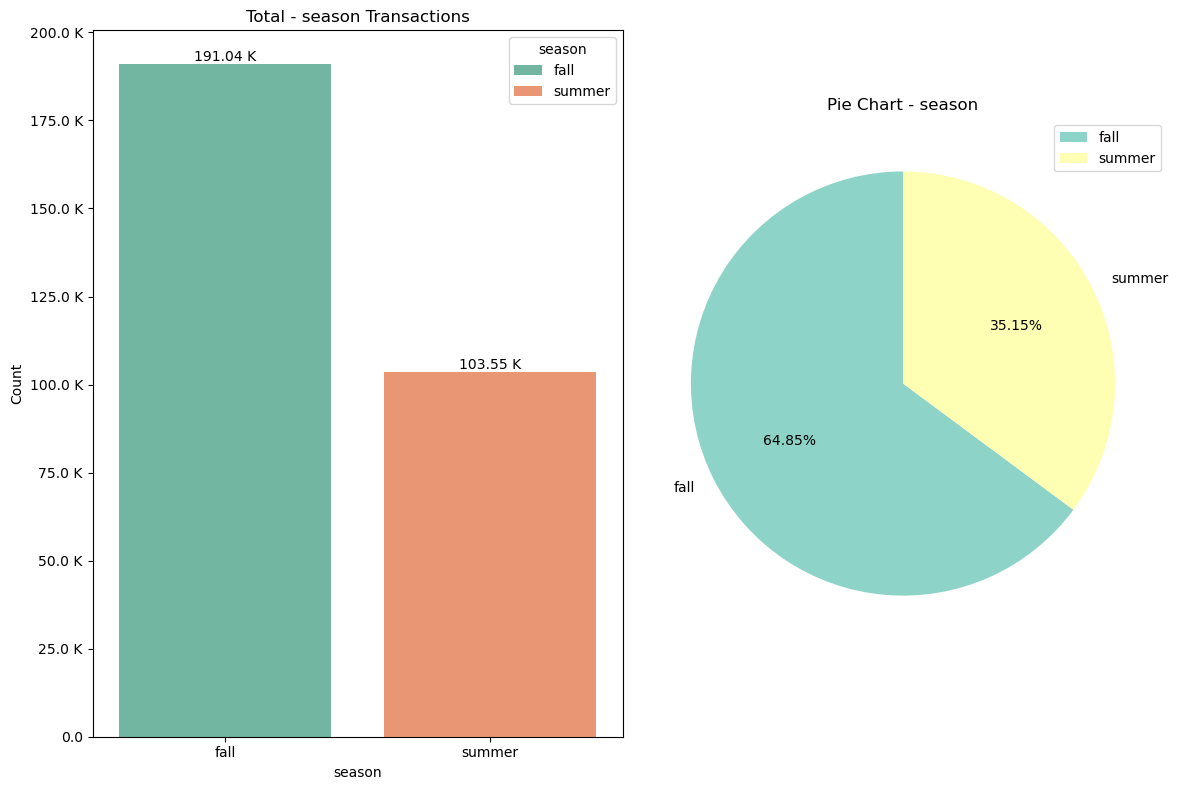

In [44]:
# specific column
var = 'season'

# canvas
plt.figure(figsize = (12, 8))

# Count Plot 
ax1 = plt.subplot(1, 2, 1)  
sns.countplot(x = var, data = cc_df, ax = ax1, hue = var, palette = 'Set2', legend = True, order = cc_df[var].value_counts().index)

# Menambahkan judul dan label
ax1.set_title(f'Total - {var} Transactions', fontsize = 12)
ax1.set_xlabel(var, fontsize = 10)  
ax1.set_ylabel('Count', fontsize = 10)  

# Menambahkan formatter untuk y-axis
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lab_round))

# Menambahkan text pada setiap batang di countplot
for p in ax1.patches:
    # ambil tinggi batang
    height = p.get_height()
    
    # hanya menambahkan teks jika tinggi batang lebih dari 0
    if height > 0:
        ax1.text(p.get_x() + p.get_width() / 2, height + 0.1,  # Menempatkan teks di atas batang
                 f'{val_round(height)}', ha = 'center', va = 'bottom', fontsize = 10)  # Teks di tengah atas batang


# Pie Chart
ax2 = plt.subplot(1, 2, 2)
counts = cc_df[var].value_counts()
ax2.pie(counts, labels = counts.index, autopct = '%0.2f%%', startangle = 90, colors = sns.color_palette("Set3", len(counts)))
ax2.set_title(f'Pie Chart - {var}', fontsize = 12)

# Adjust layout
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

#### Week Category

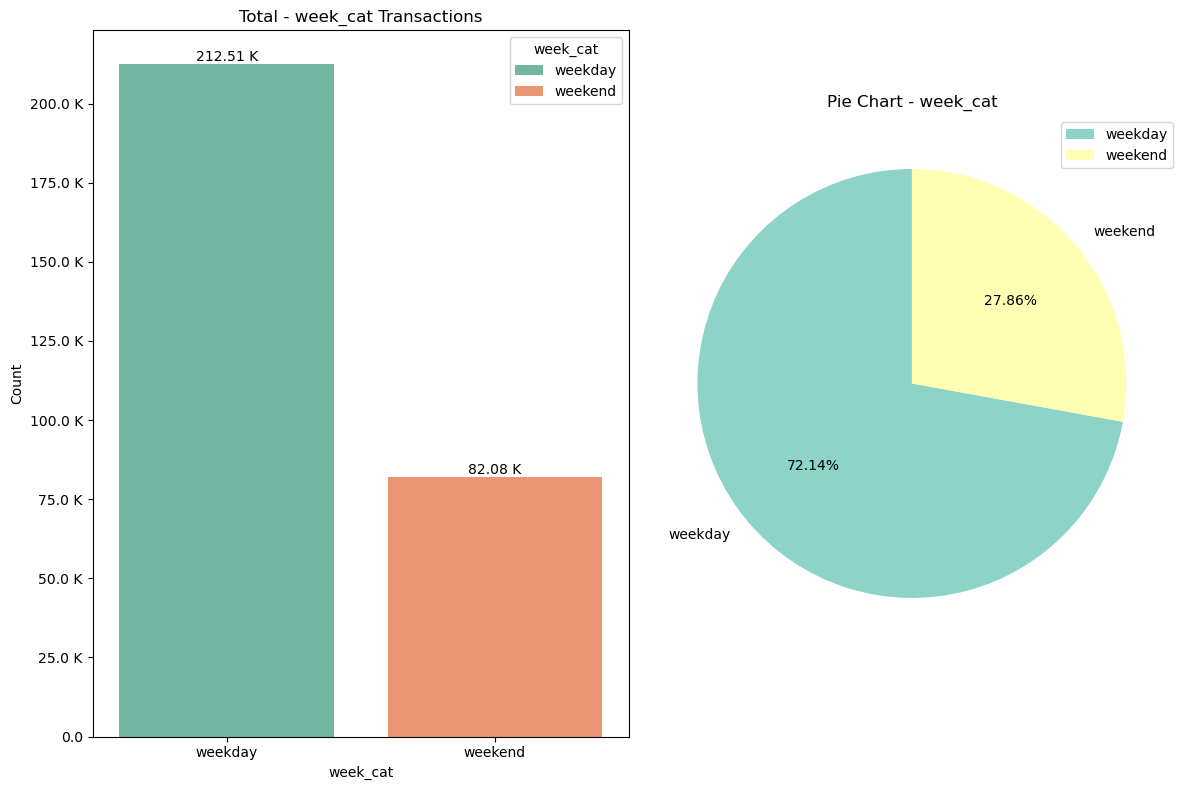

In [45]:
# specific column
var = 'week_cat'

# canvas
plt.figure(figsize = (12, 8))

# Count Plot 
ax1 = plt.subplot(1, 2, 1)  
sns.countplot(x = var, data = cc_df, ax = ax1, hue = var, palette = 'Set2', legend = True, order = cc_df[var].value_counts().index)

# Menambahkan judul dan label
ax1.set_title(f'Total - {var} Transactions', fontsize = 12)
ax1.set_xlabel(var, fontsize = 10)  
ax1.set_ylabel('Count', fontsize = 10)  

# Menambahkan formatter untuk y-axis
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lab_round))

# Menambahkan text pada setiap batang di countplot
for p in ax1.patches:
    # ambil tinggi batang
    height = p.get_height()
    
    # hanya menambahkan teks jika tinggi batang lebih dari 0
    if height > 0:
        ax1.text(p.get_x() + p.get_width() / 2, height + 0.1,  # Menempatkan teks di atas batang
                 f'{val_round(height)}', ha = 'center', va = 'bottom', fontsize = 10)  # Teks di tengah atas batang


# Pie Chart
ax2 = plt.subplot(1, 2, 2)
counts = cc_df[var].value_counts()
ax2.pie(counts, labels = counts.index, autopct = '%0.2f%%', startangle = 90, colors = sns.color_palette("Set3", len(counts)))
ax2.set_title(f'Pie Chart - {var}', fontsize = 12)

# Adjust layout
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

#### Day

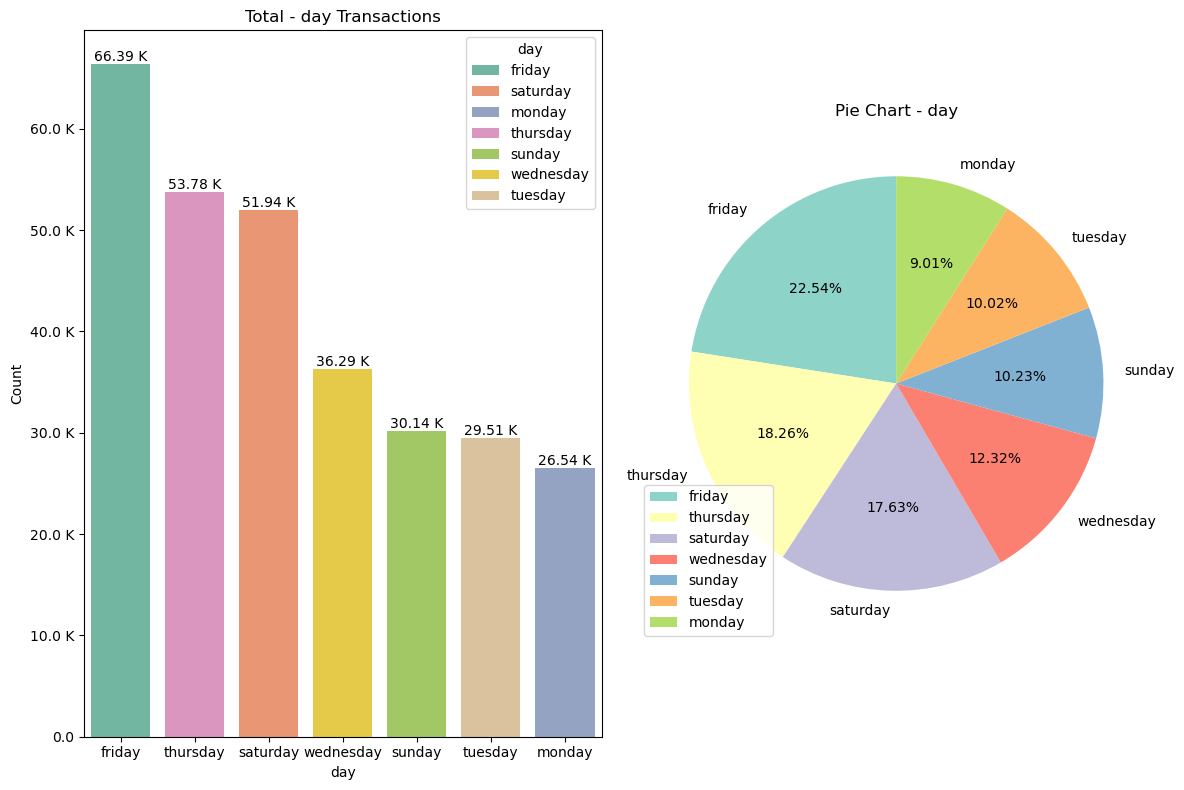

In [46]:
# specific column
var = 'day'

# canvas
plt.figure(figsize = (12, 8))

# Count Plot 
ax1 = plt.subplot(1, 2, 1)  
sns.countplot(x = var, data = cc_df, ax = ax1, hue = var, palette = 'Set2', legend = True, order = cc_df[var].value_counts().index)

# Menambahkan judul dan label
ax1.set_title(f'Total - {var} Transactions', fontsize = 12)
ax1.set_xlabel(var, fontsize = 10)  
ax1.set_ylabel('Count', fontsize = 10)  

# Menambahkan formatter untuk y-axis
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lab_round))

# Menambahkan text pada setiap batang di countplot
for p in ax1.patches:
    # ambil tinggi batang
    height = p.get_height()
    
    # hanya menambahkan teks jika tinggi batang lebih dari 0
    if height > 0:
        ax1.text(p.get_x() + p.get_width() / 2, height + 0.1,  # Menempatkan teks di atas batang
                 f'{val_round(height)}', ha = 'center', va = 'bottom', fontsize = 10)  # Teks di tengah atas batang


# Pie Chart
ax2 = plt.subplot(1, 2, 2)
counts = cc_df[var].value_counts()
ax2.pie(counts, labels = counts.index, autopct = '%0.2f%%', startangle = 90, colors = sns.color_palette("Set3", len(counts)))
ax2.set_title(f'Pie Chart - {var}', fontsize = 12)

# Adjust layout
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

#### Limit Category

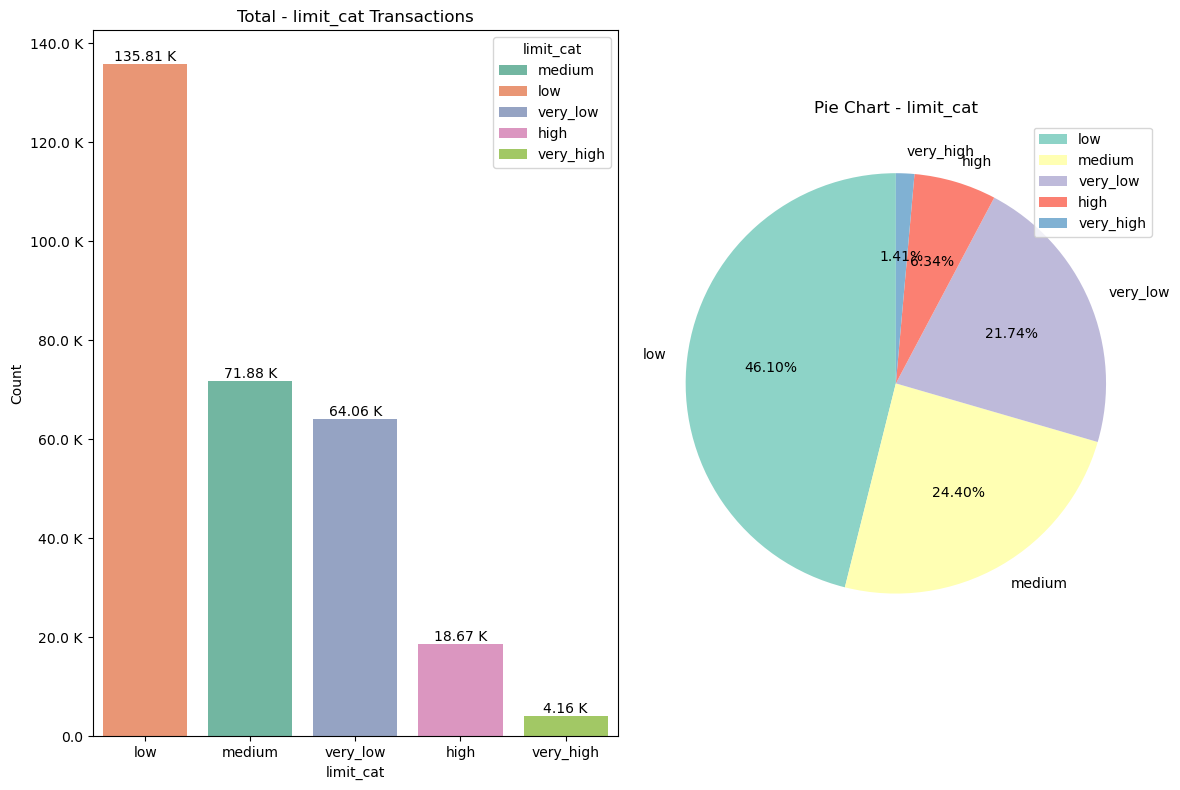

In [47]:
# specific column
var = 'limit_cat'

# canvas
plt.figure(figsize = (12, 8))

# Count Plot 
ax1 = plt.subplot(1, 2, 1)  
sns.countplot(x = var, data = cc_df, ax = ax1, hue = var, palette = 'Set2', legend = True, order = cc_df[var].value_counts().index)

# Menambahkan judul dan label
ax1.set_title(f'Total - {var} Transactions', fontsize = 12)
ax1.set_xlabel(var, fontsize = 10)  
ax1.set_ylabel('Count', fontsize = 10)  

# Menambahkan formatter untuk y-axis
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lab_round))

# Menambahkan text pada setiap batang di countplot
for p in ax1.patches:
    # ambil tinggi batang
    height = p.get_height()
    
    # hanya menambahkan teks jika tinggi batang lebih dari 0
    if height > 0:
        ax1.text(p.get_x() + p.get_width() / 2, height + 0.1,  # Menempatkan teks di atas batang
                 f'{val_round(height)}', ha = 'center', va = 'bottom', fontsize = 10)  # Teks di tengah atas batang


# Pie Chart
ax2 = plt.subplot(1, 2, 2)
counts = cc_df[var].value_counts()
ax2.pie(counts, labels = counts.index, autopct = '%0.2f%%', startangle = 90, colors = sns.color_palette("Set3", len(counts)))
ax2.set_title(f'Pie Chart - {var}', fontsize = 12)

# Adjust layout
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

#### Geo Category

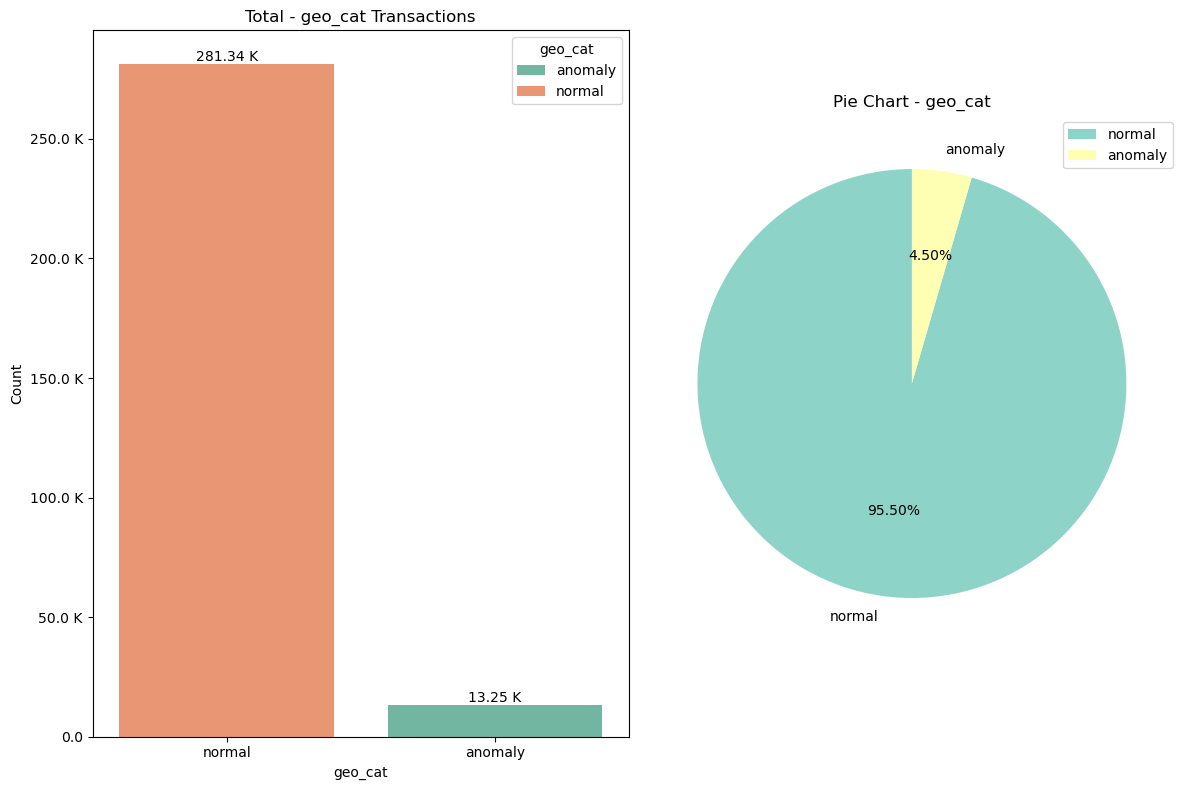

In [48]:
# specific column
var = 'geo_cat'

# canvas
plt.figure(figsize = (12, 8))

# Count Plot 
ax1 = plt.subplot(1, 2, 1)  
sns.countplot(x = var, data = cc_df, ax = ax1, hue = var, palette = 'Set2', legend = True, order = cc_df[var].value_counts().index)

# Menambahkan judul dan label
ax1.set_title(f'Total - {var} Transactions', fontsize = 12)
ax1.set_xlabel(var, fontsize = 10)  
ax1.set_ylabel('Count', fontsize = 10)  

# Menambahkan formatter untuk y-axis
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lab_round))

# Menambahkan text pada setiap batang di countplot
for p in ax1.patches:
    # ambil tinggi batang
    height = p.get_height()
    
    # hanya menambahkan teks jika tinggi batang lebih dari 0
    if height > 0:
        ax1.text(p.get_x() + p.get_width() / 2, height + 0.1,  # Menempatkan teks di atas batang
                 f'{val_round(height)}', ha = 'center', va = 'bottom', fontsize = 10)  # Teks di tengah atas batang


# Pie Chart
ax2 = plt.subplot(1, 2, 2)
counts = cc_df[var].value_counts()
ax2.pie(counts, labels = counts.index, autopct = '%0.2f%%', startangle = 90, colors = sns.color_palette("Set3", len(counts)))
ax2.set_title(f'Pie Chart - {var}', fontsize = 12)

# Adjust layout
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

#### Fraud Status

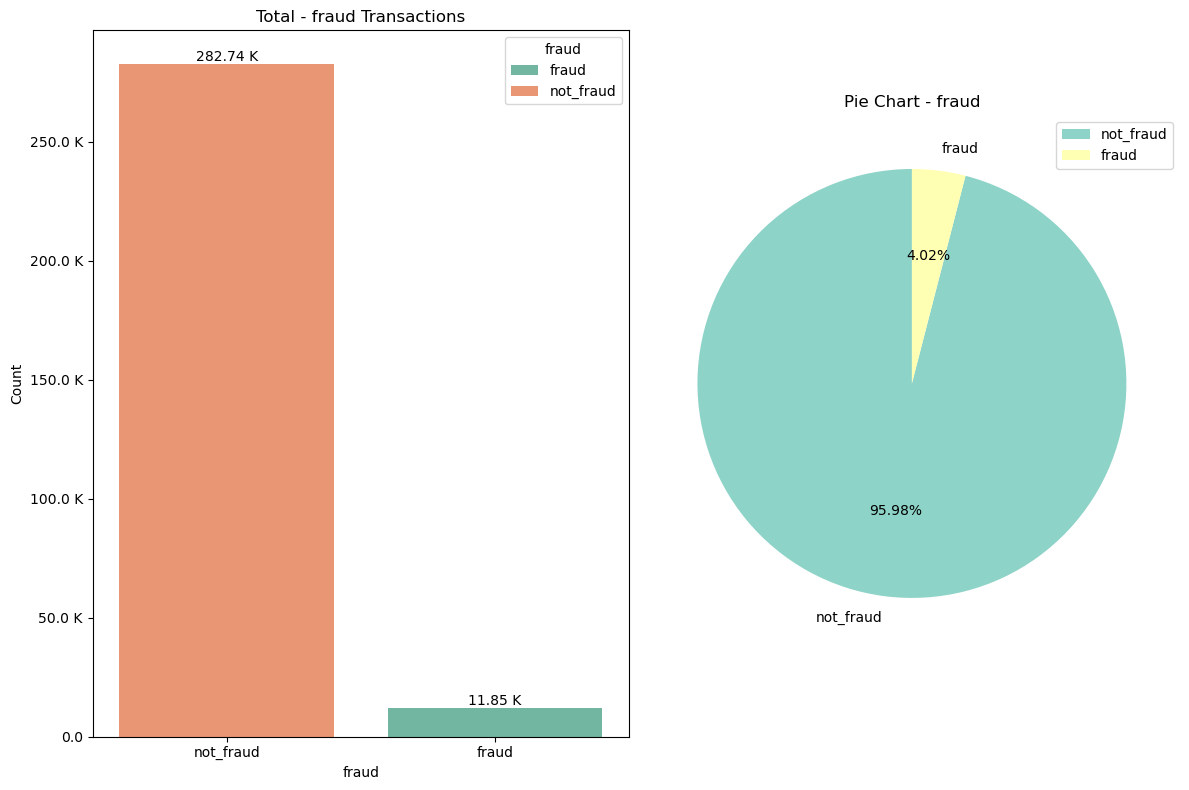

In [49]:
# specific column
var = 'fraud'

# canvas
plt.figure(figsize = (12, 8))

# Count Plot 
ax1 = plt.subplot(1, 2, 1)  
sns.countplot(x = var, data = cc_df, ax = ax1, hue = var, palette = 'Set2', legend = True, order = cc_df[var].value_counts().index)

# Menambahkan judul dan label
ax1.set_title(f'Total - {var} Transactions', fontsize = 12)
ax1.set_xlabel(var, fontsize = 10)  
ax1.set_ylabel('Count', fontsize = 10)  

# Menambahkan formatter untuk y-axis
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lab_round))

# Menambahkan text pada setiap batang di countplot
for p in ax1.patches:
    # ambil tinggi batang
    height = p.get_height()
    
    # hanya menambahkan teks jika tinggi batang lebih dari 0
    if height > 0:
        ax1.text(p.get_x() + p.get_width() / 2, height + 0.1,  # Menempatkan teks di atas batang
                 f'{val_round(height)}', ha = 'center', va = 'bottom', fontsize = 10)  # Teks di tengah atas batang


# Pie Chart
ax2 = plt.subplot(1, 2, 2)
counts = cc_df[var].value_counts()
ax2.pie(counts, labels = counts.index, autopct = '%0.2f%%', startangle = 90, colors = sns.color_palette("Set3", len(counts)))
ax2.set_title(f'Pie Chart - {var}', fontsize = 12)

# Adjust layout
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

### Bi-variate Analyst

In [50]:
# 
bi_df = cat_df.copy()
bi_df = bi_df.drop(labels = ['quarter', 'month'], axis = 1)
bi_df.head()

,state,city,date,season,week_cat,day,time,limit_cat,geo_cat,fraud
0,pa,houston,2015-09-11,fall,weekday,friday,00:32:40,medium,anomaly,fraud
1,pa,houston,2015-10-24,fall,weekend,saturday,22:23:08,medium,normal,not_fraud
2,pa,houston,2015-10-26,fall,weekday,monday,18:19:36,medium,normal,not_fraud
3,pa,houston,2015-10-22,fall,weekday,thursday,19:41:10,medium,normal,not_fraud
4,pa,houston,2015-10-26,fall,weekday,monday,20:08:22,medium,normal,not_fraud


In [51]:
from itertools import combinations

# Mencari pasangan kolom yang akan diuji
categorical_columns = bi_df.columns
column_pairs = list(combinations(categorical_columns, 2))  # Membuat pasangan kolom

# Menyimpan pasangan dengan hubungan signifikan
significant_pairs = []

# Melakukan uji Chi-Square untuk setiap pasangan kolom
alpha = 0.05  # Threshold signifikansi

for col1, col2 in column_pairs:
    contingency_table = pd.crosstab(bi_df[col1], bi_df[col2])  # Membuat tabel kontingensi
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)  # Uji Chi-Square
    
    print(f"Chi-Square Test antara {col1} dan {col2}:")
    print('=' * 50)

    print(f"\t Statistik Chi-Square: {chi2:.4f}")
    print(f"\t p-value: {p:.4f} \n")
    # print(f"\t Degrees of Freedom: {dof} \n")

    # Cek apakah hubungan signifikan
    if p < alpha:
        print(f"Test antara {col1} dan {col2} → TERDAPAT hubungan signifikan antara variabel \n")
        significant_pairs.append((col1, col2, p))  # Simpan pasangan signifikan

    else:
        print(f"Test antara {col1} dan {col2} → TIDAK ADA hubungan signifikan \n")

    print('=' * 50)

Chi-Square Test antara state dan city:
	 Statistik Chi-Square: 10015992.0000
	 p-value: 0.0000 

Test antara state dan city → TERDAPAT hubungan signifikan antara variabel 

Chi-Square Test antara state dan date:
	 Statistik Chi-Square: 3150.5996
	 p-value: 0.2346 

Test antara state dan date → TIDAK ADA hubungan signifikan 

Chi-Square Test antara state dan season:
	 Statistik Chi-Square: 30.8772
	 p-value: 0.6215 

Test antara state dan season → TIDAK ADA hubungan signifikan 

Chi-Square Test antara state dan week_cat:
	 Statistik Chi-Square: 32.9804
	 p-value: 0.5174 

Test antara state dan week_cat → TIDAK ADA hubungan signifikan 

Chi-Square Test antara state dan day:
	 Statistik Chi-Square: 224.5714
	 p-value: 0.1541 

Test antara state dan day → TIDAK ADA hubungan signifikan 

Chi-Square Test antara state dan time:
	 Statistik Chi-Square: 1758176.8046
	 p-value: 0.0000 

Test antara state dan time → TERDAPAT hubungan signifikan antara variabel 

Chi-Square Test antara state dan l

In [52]:
# Menampilkan daftar pasangan dengan hubungan signifikan
if significant_pairs:
    print("\nPasangan variabel dengan hubungan signifikan (p < 0.05):")

    for col1, col2, p in significant_pairs:
        print(f"👉 {col1} ↔ {col2} (p-value: {p:.4f})")

else:
    print("\nTidak ada pasangan variabel yang memiliki hubungan signifikan (p ≥ 0.05).")


Pasangan variabel dengan hubungan signifikan (p < 0.05):
👉 state ↔ city (p-value: 0.0000)
👉 state ↔ time (p-value: 0.0000)
👉 state ↔ limit_cat (p-value: 0.0000)
👉 state ↔ geo_cat (p-value: 0.0004)
👉 state ↔ fraud (p-value: 0.0001)
👉 city ↔ date (p-value: 0.0254)
👉 city ↔ time (p-value: 0.0000)
👉 city ↔ limit_cat (p-value: 0.0000)
👉 city ↔ geo_cat (p-value: 0.0000)
👉 city ↔ fraud (p-value: 0.0000)
👉 date ↔ season (p-value: 0.0000)
👉 date ↔ week_cat (p-value: 0.0000)
👉 date ↔ day (p-value: 0.0000)
👉 date ↔ time (p-value: 0.0000)
👉 date ↔ geo_cat (p-value: 0.0081)
👉 date ↔ fraud (p-value: 0.0023)
👉 season ↔ week_cat (p-value: 0.0000)
👉 season ↔ day (p-value: 0.0000)
👉 week_cat ↔ day (p-value: 0.0000)
👉 week_cat ↔ time (p-value: 0.0000)
👉 day ↔ time (p-value: 0.0000)
👉 time ↔ limit_cat (p-value: 0.0010)
👉 limit_cat ↔ fraud (p-value: 0.0456)
👉 geo_cat ↔ fraud (p-value: 0.0000)


In [53]:
def cramers_v(chi2, n, dof):
    return np.sqrt(chi2 / (n * dof))

selected_vars = set()

for col1, col2, p in significant_pairs:
    contingency_table = pd.crosstab(bi_df[col1], bi_df[col2])
    chi2, _, dof, _ = stats.chi2_contingency(contingency_table)
    n = bi_df.shape[0]
    
    cramer_v_value = cramers_v(chi2, n, dof)
    print(f"Cramér’s V untuk {col1} ↔ {col2}: {cramer_v_value:.4f}")

    if cramer_v_value > 0.3:  # Hanya memilih hubungan kuat (> 0.3)
        selected_vars.add(col1)
        selected_vars.add(col2)

Cramér’s V untuk state ↔ city: 0.0902
Cramér’s V untuk state ↔ time: 0.0018
Cramér’s V untuk state ↔ limit_cat: 0.0384
Cramér’s V untuk state ↔ geo_cat: 0.0026
Cramér’s V untuk state ↔ fraud: 0.0027
Cramér’s V untuk city ↔ date: 0.0019
Cramér’s V untuk city ↔ time: 0.0018
Cramér’s V untuk city ↔ limit_cat: 0.0393
Cramér’s V untuk city ↔ geo_cat: 0.0026
Cramér’s V untuk city ↔ fraud: 0.0024
Cramér’s V untuk date ↔ season: 0.1048
Cramér’s V untuk date ↔ week_cat: 0.1048
Cramér’s V untuk date ↔ day: 0.1048
Cramér’s V untuk date ↔ time: 0.0019
Cramér’s V untuk date ↔ geo_cat: 0.0022
Cramér’s V untuk date ↔ fraud: 0.0022
Cramér’s V untuk season ↔ week_cat: 0.0423
Cramér’s V untuk season ↔ day: 0.0308
Cramér’s V untuk week_cat ↔ day: 0.4082
Cramér’s V untuk week_cat ↔ time: 0.0019
Cramér’s V untuk day ↔ time: 0.0019
Cramér’s V untuk time ↔ limit_cat: 0.0019
Cramér’s V untuk limit_cat ↔ fraud: 0.0029
Cramér’s V untuk geo_cat ↔ fraud: 0.5028


In [54]:
# FIlter for Bi-Variate Analyst
print("✅ Kategori variabel yang dipilih untuk analisis selanjutnya:", selected_vars)

✅ Kategori variabel yang dipilih untuk analisis selanjutnya: {'fraud', 'day', 'geo_cat', 'week_cat'}


#### Fraud

In [55]:
monthly_fraud = cc_df.groupby(['month', 'fraud'], observed = False).agg({'credit_card': 'count'}).rename(columns = {'credit_card': 'total'})
monthly_fraud = pd.DataFrame(monthly_fraud)
monthly_fraud = monthly_fraud.reset_index()

monthly_fraud

,month,fraud,total
0,august,fraud,4008
1,august,not_fraud,95159
2,july,fraud,174
3,july,not_fraud,4207
4,october,fraud,3870
5,october,not_fraud,91144
6,september,fraud,3794
7,september,not_fraud,92232


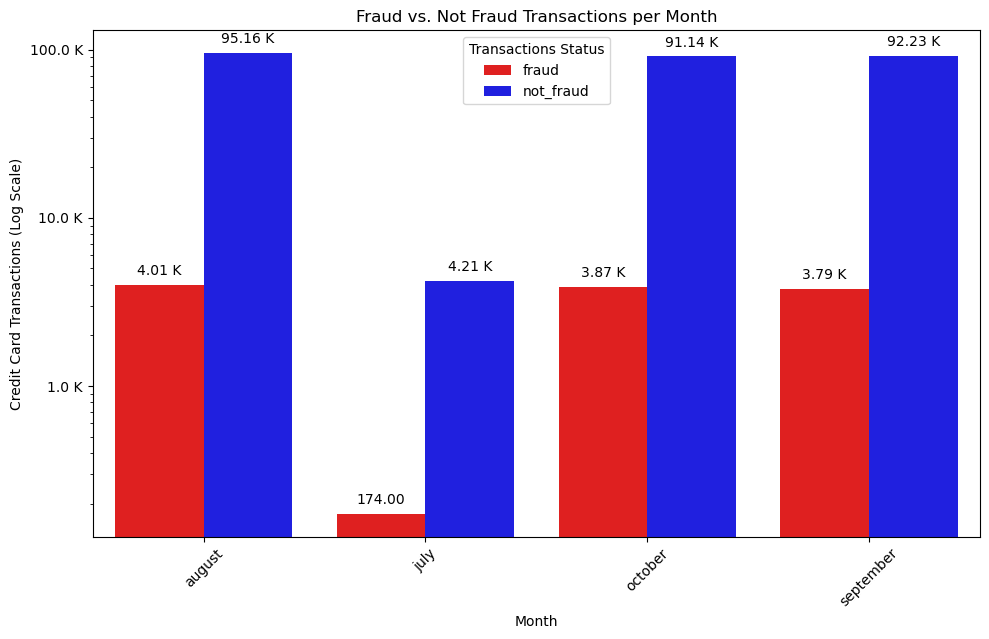

In [56]:
# Plot dengan skala logaritmik
plt.figure(figsize = (10, 6))
ax = sns.barplot(data = monthly_fraud, x = "month", y = "total", hue = "fraud", palette = ["red", "blue"])

# Menampilkan nilai di atas batang dengan format singkat
for p in ax.patches:
    height = p.get_height()
    ax.annotate(val_round(height), 
                (p.get_x() + p.get_width() / 2., height), 
                ha = 'center', va = 'bottom', fontsize = 10, color = 'black', xytext = (0, 5),
                textcoords = 'offset points')

# Mengatur skala logaritmik agar data lebih proporsional
ax.set_yscale("log")

# Mengatur format label sumbu y
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lab_round))

# Labels dan title
plt.title("Fraud vs. Not Fraud Transactions per Month")
plt.xlabel("Month")
plt.ylabel("Credit Card Transactions (Log Scale)")

plt.legend(title = "Transactions Status", loc = 'best')
plt.tight_layout()
plt.xticks(rotation = 45)

plt.show()

#### Fraud Transactions

In [57]:
transactions_fraud = cc_df.groupby(['month', 'fraud'], observed = False).agg({'transaction_dollar_amount': 'sum'}).rename(columns = {'transaction_dollar_amount': 'total'})
transactions_fraud = pd.DataFrame(transactions_fraud).reset_index()
transactions_fraud = transactions_fraud[transactions_fraud['fraud'] == 'fraud'].drop(columns = 'fraud').reset_index(drop = True)

transactions_fraud

,month,total
0,august,1816704.21
1,july,79279.09
2,october,1783100.11
3,september,1705662.56


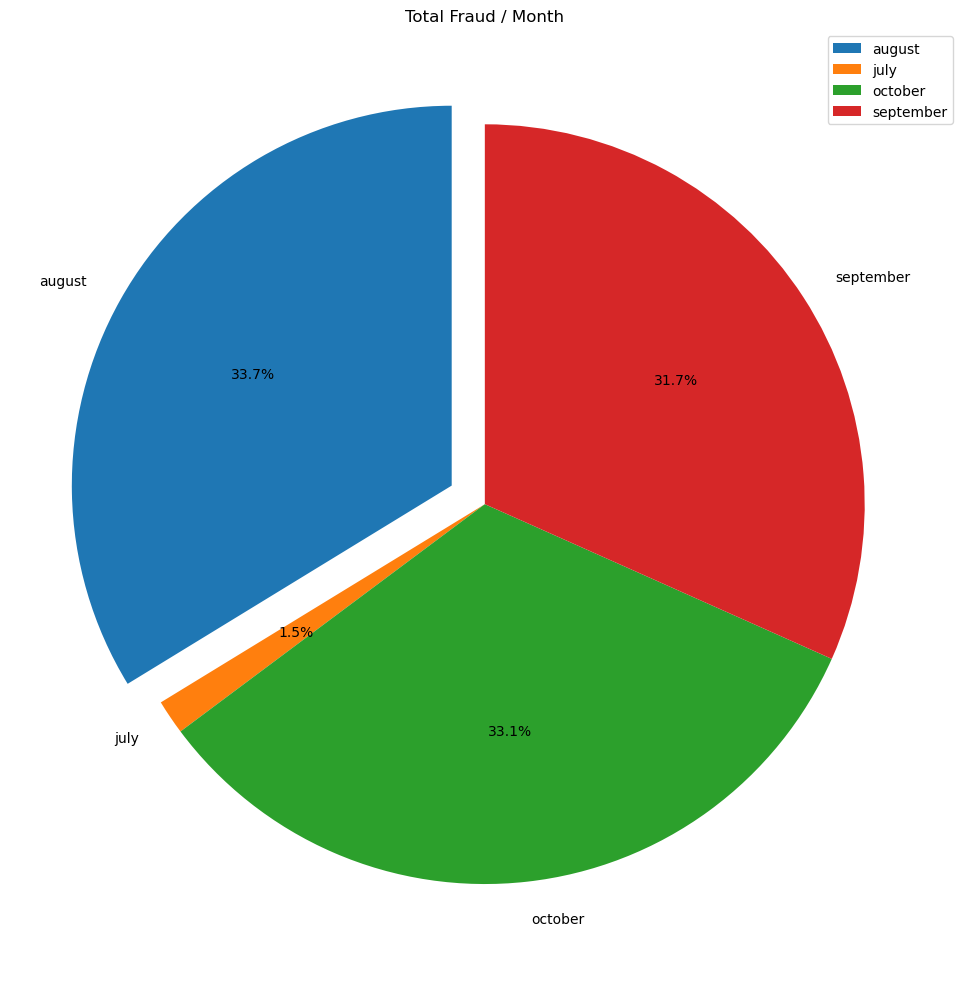

In [58]:
# Membuat Pie Chart
plt.figure(figsize = (12, 10))  # Ukuran plot

max_index = transactions_fraud["total"].idxmax()  # Find the index of the highest value
explode = [0.1 if idx == max_index else 0 for idx in range(len(transactions_fraud))]  # Explode the highest slice

plt.pie(transactions_fraud["total"], 
        labels = transactions_fraud["month"], 
        autopct = '%1.1f%%', 
        startangle = 90, 
        explode = explode)

# Tambahkan Judul
plt.title("Total Fraud / Month")

# Tampilkan Plot
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

#### Top Fraud City

In [59]:
city_fraud = cc_df.groupby(['city', 'fraud'], observed = False).agg({'credit_card': 'count'}).rename(columns = {'credit_card': 'total'})
city_fraud = pd.DataFrame(city_fraud).reset_index()
city_fraud = city_fraud[city_fraud['fraud'] == 'fraud'].drop(columns = 'fraud').sort_values(by = 'total', ascending = False).reset_index(drop = True)
city_fraud = city_fraud.head()

city_fraud

,city,total
0,washington,4458
1,houston,830
2,new york,613
3,el paso,521
4,dallas,393


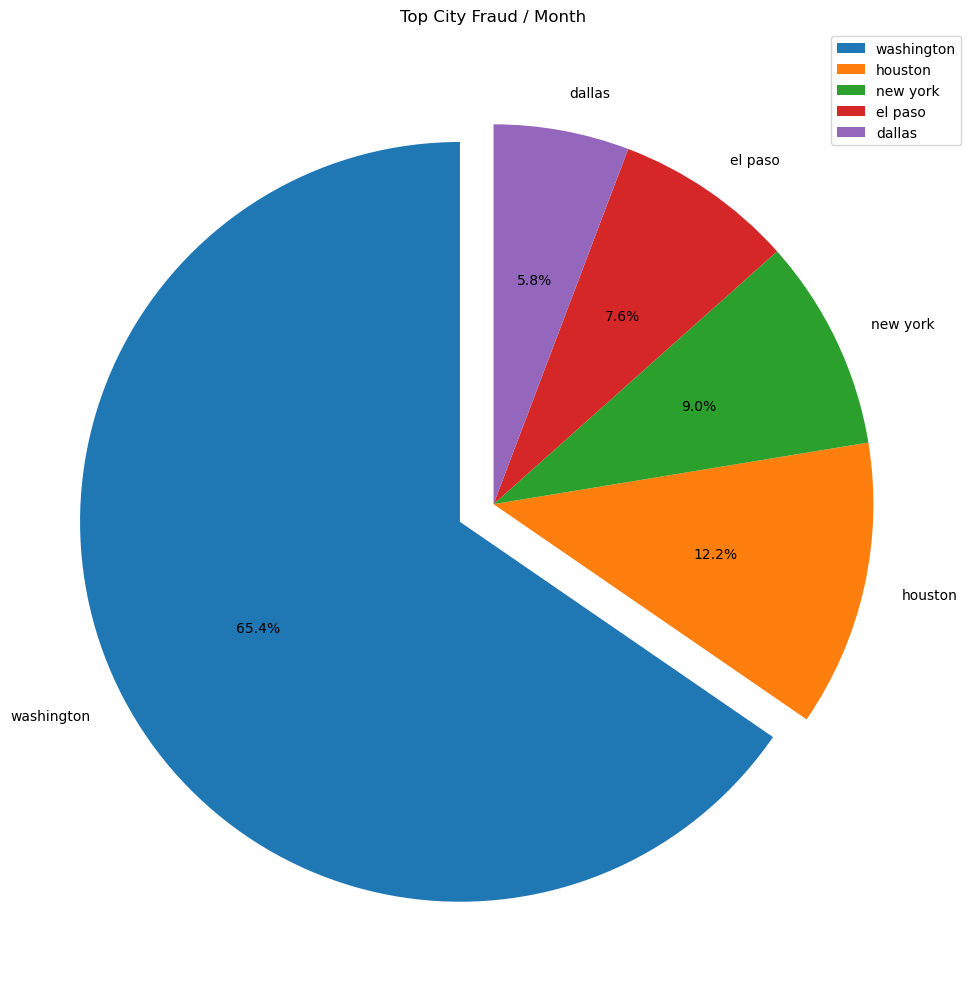

In [60]:
# Membuat Pie Chart
plt.figure(figsize = (12, 10))  # Ukuran plot

max_index = city_fraud["total"].idxmax()  # Find the index of the highest value
explode = [0.1 if idx == max_index else 0 for idx in range(len(city_fraud))]  # Explode the highest slice

plt.pie(city_fraud["total"], 
        labels = city_fraud["city"], 
        autopct = '%1.1f%%', 
        startangle = 90, 
        explode = explode)

# Tambahkan Judul
plt.title("Top City Fraud / Month")

# Tampilkan Plot
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

# Write Data

In [61]:
# 
pickle_data = cc_df.copy()
pickle_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294588 entries, 0 to 294587
Data columns (total 25 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   credit_card                294588 non-null  int64         
 1   datetime                   294588 non-null  datetime64[ns]
 2   long                       294588 non-null  float64       
 3   lat                        294588 non-null  float64       
 4   zipcode                    294588 non-null  int64         
 5   state                      294588 non-null  object        
 6   city                       294588 non-null  object        
 7   date                       294588 non-null  object        
 8   year                       294588 non-null  int32         
 9   quarter                    294588 non-null  object        
 10  month                      294588 non-null  object        
 11  season                     294588 non-null  object  

In [62]:
pickle_data.head()

,credit_card,datetime,long,lat,zipcode,state,city,date,year,quarter,month,season,week_cat,day,time,limit_cat,transaction_dollar_amount,prev_time,time_diff_hour,prev_long,prev_lat,distance_km,geo_cat,speed_km/h,fraud
0,1003715054175576,2015-09-11 00:32:40,-80.174132,40.267370,15342,pa,houston,2015-09-11,2015,2015Q3,september,fall,weekday,friday,00:32:40,medium,43.78,2015-09-11 00:32:40,0.00,0.000000,0.000000,9177.582847,anomaly,0.00,fraud
1,1003715054175576,2015-10-24 22:23:08,-80.194240,40.180114,15342,pa,houston,2015-10-24,2015,2015Q4,october,fall,weekend,saturday,22:23:08,medium,103.15,2015-09-11 00:32:40,1053.84,-80.174132,40.267370,9.838861,normal,0.01,not_fraud
2,1003715054175576,2015-10-26 18:19:36,-80.211033,40.313004,15342,pa,houston,2015-10-26,2015,2015Q4,october,fall,weekday,monday,18:19:36,medium,48.55,2015-10-24 22:23:08,43.94,-80.194240,40.180114,14.825103,normal,0.34,not_fraud
3,1003715054175576,2015-10-22 19:41:10,-80.174138,40.290895,15342,pa,houston,2015-10-22,2015,2015Q4,october,fall,weekday,thursday,19:41:10,medium,136.18,2015-10-26 18:19:36,94.64,-80.211033,40.313004,3.983158,normal,0.04,not_fraud
4,1003715054175576,2015-10-26 20:08:22,-80.238720,40.166719,15342,pa,houston,2015-10-26,2015,2015Q4,october,fall,weekday,monday,20:08:22,medium,71.82,2015-10-22 19:41:10,96.45,-80.174138,40.290895,14.843545,normal,0.15,not_fraud


#### Hashing Data

In [63]:
# Add key column
pickle_data['cc_id'] = pickle_data.index.astype(str) + '-' + np.random.random(len(pickle_data)).astype(str)
pickle_data['trx_id'] = pickle_data.index.astype(str) + '-' + np.random.random(len(pickle_data)).astype(str)

# check specific duplicate
print(f"Total Specific Duplicate: {pickle_data['credit_card'].duplicated().sum()}")
print(f"Total Specific Duplicate: {pickle_data['trx_id'].duplicated().sum()}")

Total Specific Duplicate: 293604
Total Specific Duplicate: 0


In [64]:
# Fungsi untuk melakukan hashing dengan penanganan NaN
def hash_with_sha256(value):
    if pd.isna(value):  
        return None  
    
    return hashlib.sha256(value.encode()).hexdigest()

# Terapkan fungsi hashing ke kolom yang diinginkan
pickle_data['cc_id'] = pickle_data['cc_id'].apply(hash_with_sha256)
pickle_data['trx_id'] = pickle_data['trx_id'].apply(hash_with_sha256)

pickle_data.head()

,credit_card,datetime,long,lat,zipcode,state,city,date,year,quarter,month,season,week_cat,day,time,limit_cat,transaction_dollar_amount,prev_time,time_diff_hour,prev_long,prev_lat,distance_km,geo_cat,speed_km/h,fraud,cc_id,trx_id
0,1003715054175576,2015-09-11 00:32:40,-80.174132,40.267370,15342,pa,houston,2015-09-11,2015,2015Q3,september,fall,weekday,friday,00:32:40,medium,43.78,2015-09-11 00:32:40,0.00,0.000000,0.000000,9177.582847,anomaly,0.00,fraud,d7951af6fadeac15d878bacf59faee79c1168f913b5d65...,186004a6068cbf384c80c7cc7480a27bc2e22d2680ae39...
1,1003715054175576,2015-10-24 22:23:08,-80.194240,40.180114,15342,pa,houston,2015-10-24,2015,2015Q4,october,fall,weekend,saturday,22:23:08,medium,103.15,2015-09-11 00:32:40,1053.84,-80.174132,40.267370,9.838861,normal,0.01,not_fraud,2acc07572a7125ef1818eaabff97fff02f8547794d6e7f...,8a251901958c225fc57af11336b1232d5818f559b2f27e...
2,1003715054175576,2015-10-26 18:19:36,-80.211033,40.313004,15342,pa,houston,2015-10-26,2015,2015Q4,october,fall,weekday,monday,18:19:36,medium,48.55,2015-10-24 22:23:08,43.94,-80.194240,40.180114,14.825103,normal,0.34,not_fraud,c683df9e916f4ecd3b7e403883df5e2ef1612a4a1fafaa...,7873369d6c66d9d7997855e2b8139107b0d11a3e9df17e...
3,1003715054175576,2015-10-22 19:41:10,-80.174138,40.290895,15342,pa,houston,2015-10-22,2015,2015Q4,october,fall,weekday,thursday,19:41:10,medium,136.18,2015-10-26 18:19:36,94.64,-80.211033,40.313004,3.983158,normal,0.04,not_fraud,c2577bc76b323c09afc95fd4d00e069867d09832522d5d...,4910a85378405004174e86d95afc5933e00c09e0562923...
4,1003715054175576,2015-10-26 20:08:22,-80.238720,40.166719,15342,pa,houston,2015-10-26,2015,2015Q4,october,fall,weekday,monday,20:08:22,medium,71.82,2015-10-22 19:41:10,96.45,-80.174138,40.290895,14.843545,normal,0.15,not_fraud,4d6440813e0959a56191841b87318692375954efde29b2...,0e0b3f05bae0504dcf28d26eb7f9c80bfed559f13c7c5e...


In [65]:
# Check Duplicate
print(f'Total CC Id Duplicate: {pickle_data["cc_id"].duplicated().sum()}')
print(f'Total Transactions Id Duplicate: {pickle_data["trx_id"].duplicated().sum()}\n')

# Check unique table
print(f'Is CC Id unique: {pickle_data["cc_id"].is_unique}')
print(f'Is Transactions Id unique: {pickle_data["trx_id"].is_unique}')

Total CC Id Duplicate: 0
Total Transactions Id Duplicate: 0

Is CC Id unique: True
Is Transactions Id unique: True


In [66]:
pickle_data = pickle_data.sort_values(by = 'datetime', ascending = True).reset_index(drop = True)
pickle_data.head()

,credit_card,datetime,long,lat,zipcode,state,city,date,year,quarter,month,season,week_cat,day,time,limit_cat,transaction_dollar_amount,prev_time,time_diff_hour,prev_long,prev_lat,distance_km,geo_cat,speed_km/h,fraud,cc_id,trx_id
0,9484591448272784,2015-07-31 09:39:48,-90.045639,29.889039,70112,la,new orleans,2015-07-31,2015,2015Q3,july,summer,weekday,friday,09:39:48,very_low,17.99,2015-10-27 20:34:03,2122.90,-90.151504,29.945202,11.969568,normal,0.01,not_fraud,fa5cc43fa04e2dfdfd63c16638d485b95c679d6ad56e63...,7c7b74141d438a10410c6af617c405f596b23d6691c0ca...
1,7053196367895112,2015-07-31 11:03:48,-74.027561,40.689615,10001,ny,new york,2015-07-31,2015,2015Q3,july,summer,weekday,friday,11:03:48,low,12.09,2015-08-29 17:05:27,702.03,-73.927029,40.806511,15.511210,normal,0.02,not_fraud,d578d6057e09202141d896fdf5225e21b2e9667f811425...,bbbdacccde18af756cea741863cdc2315eeb5da20e4d03...
2,9528285469413252,2015-07-31 11:10:14,-72.139485,43.108100,3280,nh,washington,2015-07-31,2015,2015Q3,july,summer,weekday,friday,11:10:14,very_high,78.21,2015-10-14 19:06:04,1807.93,-72.064113,43.172281,9.404226,normal,0.01,not_fraud,c7609a7d7ae21b8f05b5939c23fd70443565a030a4f3e7...,2bc2b25359ae1ffe5ef9e8b539a816536971f88f6bf76e...
3,1845720274833905,2015-07-31 11:28:55,-89.002148,40.804323,61738,il,el paso,2015-07-31,2015,2015Q3,july,summer,weekday,friday,11:28:55,medium,74.41,2015-08-29 19:33:54,704.08,-88.974492,40.720877,9.556419,normal,0.01,not_fraud,08dd431e05754307851c422032d9ce2dedd05ea72dd3a4...,b19ee38c1def42021e0624b7c0ede907bb41175e4ac34e...
4,7850942767136368,2015-07-31 11:38:51,-72.025675,43.210753,3280,nh,washington,2015-07-31,2015,2015Q3,july,summer,weekday,friday,11:38:51,very_low,54.89,2015-08-21 03:39:50,496.02,-72.125392,43.219223,8.157130,normal,0.02,not_fraud,0e208305f2f8ec7b8660e2dc8a25761481b399e1d8c254...,6da26f20cbea17f6e4af469994b21641aac2784a5e53cc...


In [67]:
# Tentukan folder tujuan
dir_name = 'datamart'
folder_path = f"../{dir_name}"

# Cek apakah folder sudah ada, jika belum buat foldernya
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
    
    print(f"Directory '{dir_name}' created successfully.")

else: 
    print(f'Directory has already been created.')

Directory has already been created.


In [68]:
# calculate dataframe size
total_size_bytes = sys.getsizeof(pickle_data)

# Converse bytes to MB
total_size_mb = total_size_bytes / 1048576
print(f"Total size of DataFrame: {total_size_mb:.2f} MB")

Total size of DataFrame: 310.96 MB


In [69]:
# save pickle
with open(share['CLEAN_DATA'], 'wb') as f:
    pickle.dump(pickle_data, f)

## Data Mart

In [70]:
csv_data = pickle_data.copy()
csv_data.columns

Index(['credit_card', 'datetime', 'long', 'lat', 'zipcode', 'state', 'city',
       'date', 'year', 'quarter', 'month', 'season', 'week_cat', 'day', 'time',
       'limit_cat', 'transaction_dollar_amount', 'prev_time', 'time_diff_hour',
       'prev_long', 'prev_lat', 'distance_km', 'geo_cat', 'speed_km/h',
       'fraud', 'cc_id', 'trx_id'],
      dtype='object')

### cc_info

In [71]:
cc_info_list = ['cc_id', 'credit_card', 'state', 'city', 'zipcode', 'year', 
                'quarter', 'month', 'season', 'week_cat', 'day', 'limit_cat']

cc_info_dm = csv_data[cc_info_list]
cc_info_dm.head()

,cc_id,credit_card,state,city,zipcode,year,quarter,month,season,week_cat,day,limit_cat
0,fa5cc43fa04e2dfdfd63c16638d485b95c679d6ad56e63...,9484591448272784,la,new orleans,70112,2015,2015Q3,july,summer,weekday,friday,very_low
1,d578d6057e09202141d896fdf5225e21b2e9667f811425...,7053196367895112,ny,new york,10001,2015,2015Q3,july,summer,weekday,friday,low
2,c7609a7d7ae21b8f05b5939c23fd70443565a030a4f3e7...,9528285469413252,nh,washington,3280,2015,2015Q3,july,summer,weekday,friday,very_high
3,08dd431e05754307851c422032d9ce2dedd05ea72dd3a4...,1845720274833905,il,el paso,61738,2015,2015Q3,july,summer,weekday,friday,medium
4,0e208305f2f8ec7b8660e2dc8a25761481b399e1d8c254...,7850942767136368,nh,washington,3280,2015,2015Q3,july,summer,weekday,friday,very_low


In [72]:
# Tentukan folder tujuan
dir_name = 'datamart'
folder_path = f"../{dir_name}"

# Cek apakah folder sudah ada, jika belum buat foldernya
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
    
    print(f"Directory '{dir_name}' created successfully.")

else: 
    print(f'Directory has already been created.')

Directory has already been created.


In [73]:
# calculate dataframe size
total_size_bytes = sys.getsizeof(cc_info_dm)

# Converse bytes to MB
total_size_mb = total_size_bytes / 1048576
print(f"Total size of DataFrame: {total_size_mb:.2f} MB")

Total size of DataFrame: 181.20 MB


In [74]:
# parameter
share = {**dotenv_values('../.env.shared')} 

cc_info_write = share['CC_INFO'] 

# save to csv
cc_info_dm.to_csv(cc_info_write, index = False, sep = ';')
print('Data has been saved')

Data has been saved


### cc_transactions

In [75]:
cc_transactions_list = ['cc_id', 'trx_id', 'datetime', 'transaction_dollar_amount', 
                        'time_diff_hour', 'long', 'prev_long', 'lat', 'prev_lat', 
                        'distance_km', 'geo_cat', 'fraud']

cc_transactions_dm = csv_data[cc_transactions_list]
cc_transactions_dm.head()

,cc_id,trx_id,datetime,transaction_dollar_amount,time_diff_hour,long,prev_long,lat,prev_lat,distance_km,geo_cat,fraud
0,fa5cc43fa04e2dfdfd63c16638d485b95c679d6ad56e63...,7c7b74141d438a10410c6af617c405f596b23d6691c0ca...,2015-07-31 09:39:48,17.99,2122.90,-90.045639,-90.151504,29.889039,29.945202,11.969568,normal,not_fraud
1,d578d6057e09202141d896fdf5225e21b2e9667f811425...,bbbdacccde18af756cea741863cdc2315eeb5da20e4d03...,2015-07-31 11:03:48,12.09,702.03,-74.027561,-73.927029,40.689615,40.806511,15.511210,normal,not_fraud
2,c7609a7d7ae21b8f05b5939c23fd70443565a030a4f3e7...,2bc2b25359ae1ffe5ef9e8b539a816536971f88f6bf76e...,2015-07-31 11:10:14,78.21,1807.93,-72.139485,-72.064113,43.108100,43.172281,9.404226,normal,not_fraud
3,08dd431e05754307851c422032d9ce2dedd05ea72dd3a4...,b19ee38c1def42021e0624b7c0ede907bb41175e4ac34e...,2015-07-31 11:28:55,74.41,704.08,-89.002148,-88.974492,40.804323,40.720877,9.556419,normal,not_fraud
4,0e208305f2f8ec7b8660e2dc8a25761481b399e1d8c254...,6da26f20cbea17f6e4af469994b21641aac2784a5e53cc...,2015-07-31 11:38:51,54.89,496.02,-72.025675,-72.125392,43.210753,43.219223,8.157130,normal,not_fraud


In [76]:
# Tentukan folder tujuan
dir_name = 'datamart'
folder_path = f"../{dir_name}"

# Cek apakah folder sudah ada, jika belum buat foldernya
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
    
    print(f"Directory '{dir_name}' created successfully.")

else: 
    print(f'Directory has already been created.')

Directory has already been created.


In [77]:
# calculate dataframe size
total_size_bytes = sys.getsizeof(cc_transactions_dm)

# Converse bytes to MB
total_size_mb = total_size_bytes / 1048576
print(f"Total size of DataFrame: {total_size_mb:.2f} MB")

Total size of DataFrame: 122.18 MB


In [78]:
# parameter
share = {**dotenv_values('../.env.shared')} 

cc_transactions_write = share['CC_TRANSACTIONS'] 

# save to csv
cc_transactions_dm.to_csv(cc_transactions_write, index = False, sep = ';')
print('Data has been saved')

Data has been saved


# Problem Statement

1. How to achieve efficiency and accuracy in detecting fraudulent transactions in order to reduce financial losses?